# Prédire les survivants du Titanic

<img src="https://raw.githubusercontent.com/rbizoi/PythonFormation/main/images/titanic.jpg" width="800">  

In [1]:
import time
import pandas as pd, numpy as np, seaborn as sns
import warnings 
import os
from matplotlib import pyplot as plt

from datetime import datetime
warnings.filterwarnings(action="ignore")

%matplotlib inline

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=2)

In [2]:
train=pd.read_csv("../../donnees/titanic-train.csv")
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv("../../donnees/titanic-test.csv")
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
donnees = pd.concat([train,test],sort=False) #, ignore_index=True
donnees.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
donnees[donnees.Survived.isna()].tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
donnees['Title'] = donnees.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(donnees['Title'], donnees['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [8]:
# donnees['Title'] = donnees['Title'].replace(['Dr','Rev'],'Soigneur')
# donnees['Title'] = donnees['Title'].replace(['Capt','Col','Major'], 'Militaire')
# donnees['Title'] = donnees['Title'].replace(['Lady', 'Countess',  'Don',  'Sir', 'Jonkheer', 'Dona'], 'Noblesse')

donnees['Title'] = donnees['Title'].replace(['Lady', 'Countess',  'Don',  'Sir', 'Jonkheer', 
                                             'Dona','Capt','Col','Major',
                                             'Dr','Rev'], 'Noblesse')

donnees['Title'] = donnees['Title'].replace('Mlle', 'Miss')
donnees['Title'] = donnees['Title'].replace('Ms', 'Miss')
donnees['Title'] = donnees['Title'].replace('Mme', 'Mrs')
donnees['Sex']   = donnees['Sex'].replace("male","Homme")
donnees['Sex']   = donnees['Sex'].replace("female","Femme")
pd.crosstab(donnees['Title'], donnees['Sex'])

Sex,Femme,Homme
Title,,
Master,0,61
Miss,264,0
Mr,0,757
Mrs,198,0
Noblesse,4,25


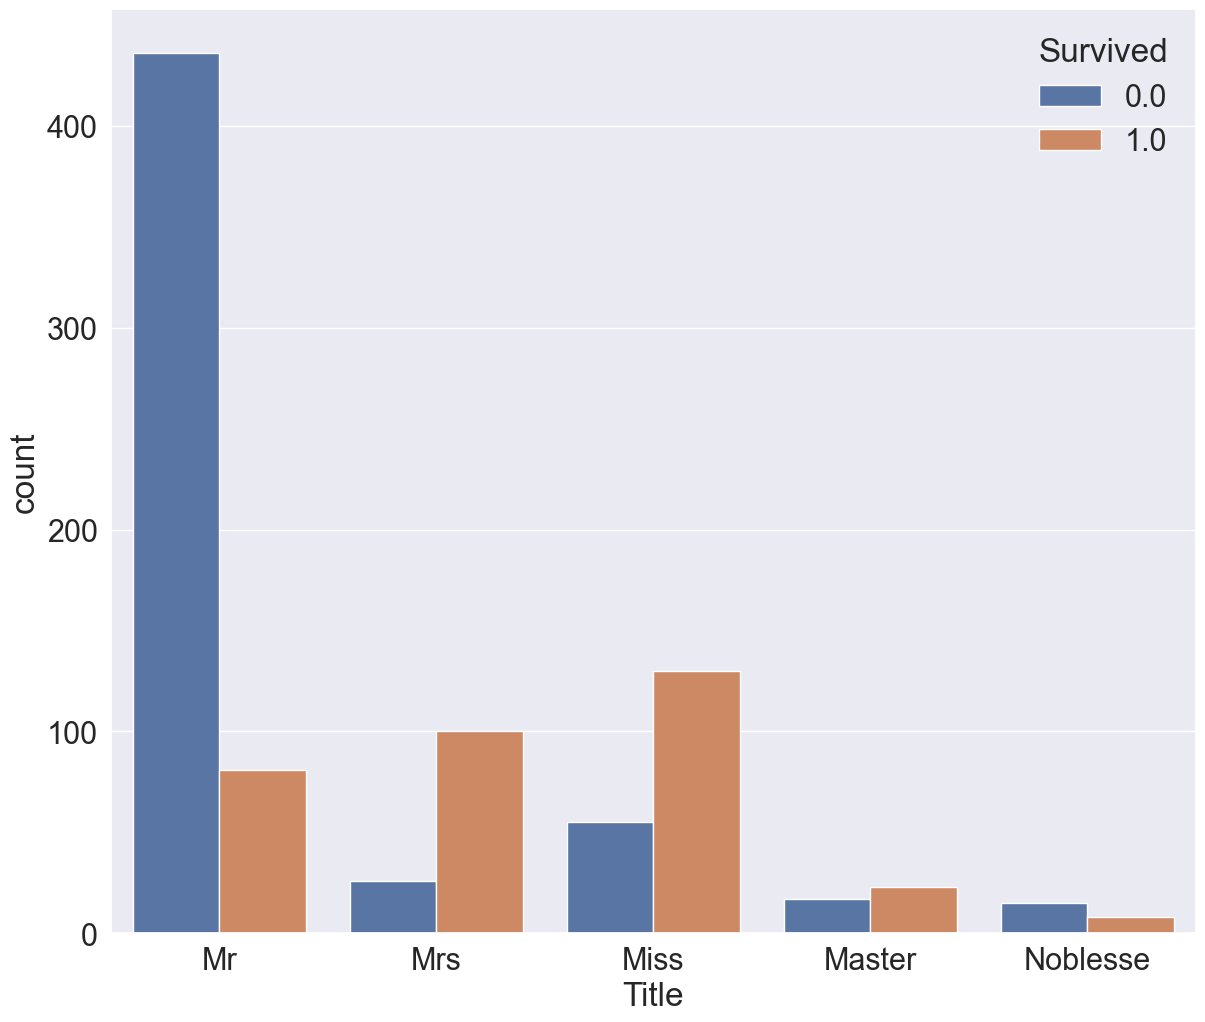

In [9]:
plt.figure(figsize=(14,12))
sns_plot = sns.countplot(x='Title',hue='Survived',data=donnees)

In [10]:
donnees.Name = donnees.Name.str.extract('([A-Za-z]+)\,', expand=False)
donnees.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,Braund,Homme,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,Cumings,Femme,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,Heikkinen,Femme,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,Futrelle,Femme,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,Allen,Homme,35.0,0,0,373450,8.0500,NaN,S,Mr


In [11]:
donnees['TailleFamille'] = donnees['Parch'] + donnees['SibSp'] + 1
donnees.TailleFamille = donnees.TailleFamille.astype('int8')

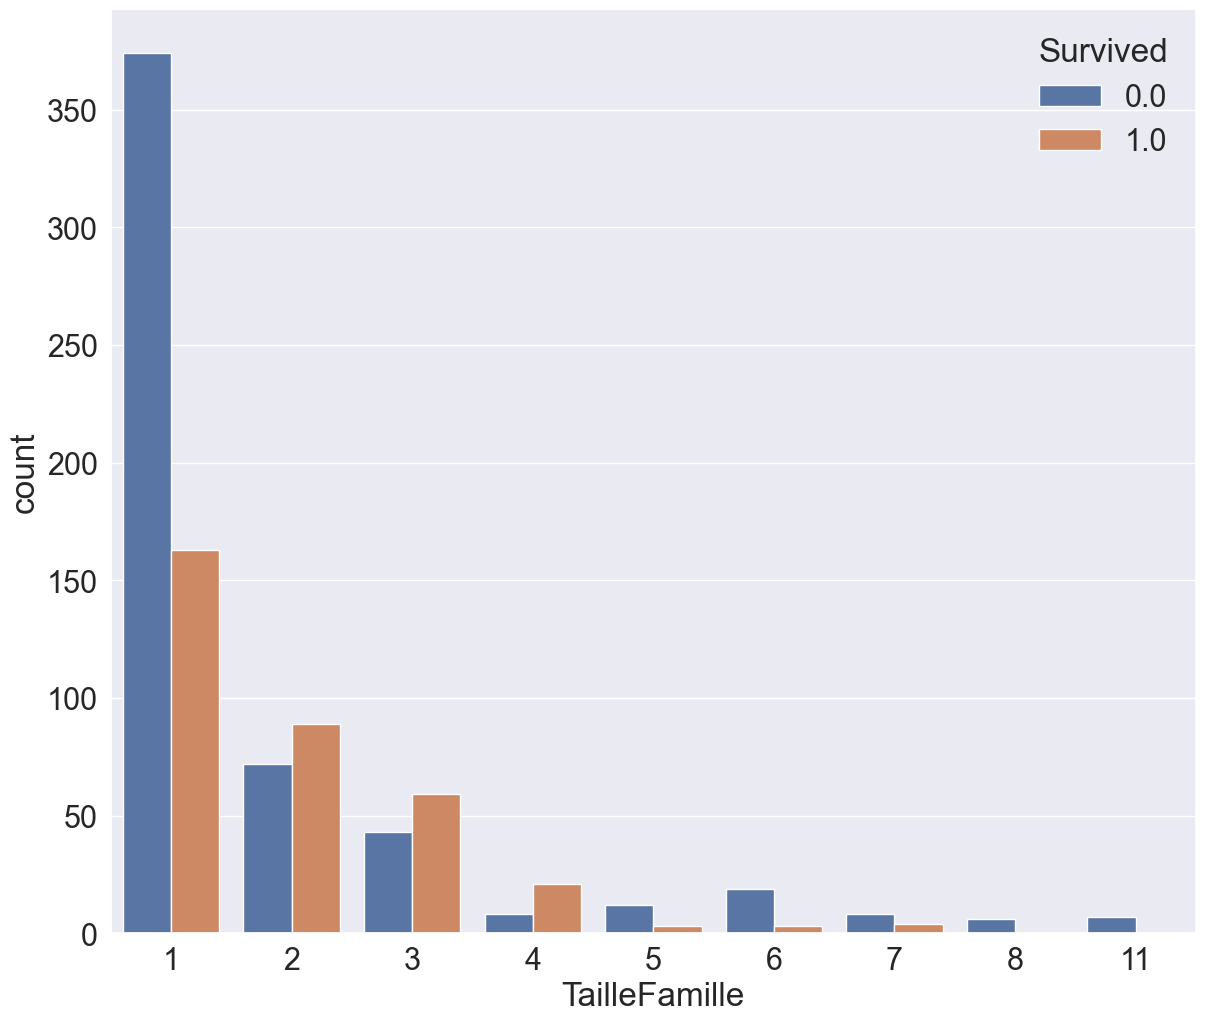

In [12]:
plt.figure(figsize=(14,12))
sns_plot = sns.countplot(x='TailleFamille',hue='Survived',data=donnees)

In [13]:
donnees['Pont'] = donnees.Cabin.str.extract('([A-Za-z])', expand=False)
donnees.Pont = donnees.Pont.fillna('Pas')
pd.crosstab(donnees.Pont, np.ones(donnees.shape[0]))

col_0,1.0
Pont,
A,22
B,65
C,94
D,46
E,41
F,21
G,5
Pas,1014
T,1


In [14]:
donnees.Ticket = donnees.Ticket.replace(regex=r'([^a-zA-Z]+)',value='')
donnees.Ticket = donnees.Ticket.replace({r'^(CASOTON|SOTONO|STONO|STONOQ)$':'SOTONOQ', 
                                         r'^(SC|SCParis)$':'SCPARIS', 
                                         r'^FCC$':'FC',
                                         r'^$':'Vide'}, regex=True) 

In [15]:
donnees['Classe'] = donnees.Pclass
donnees['Port'] = donnees.Embarked
donnees.Port = donnees.Port.fillna('Pas')
donnees['Cabine'] = donnees["Cabin"].apply(
                     lambda x: 0 if type(x) == float else 1)
donnees['Conjoints'] = donnees.SibSp
donnees['Enfants']   = donnees.Parch

donnees = donnees.drop(["Parch","SibSp","Cabin","Pclass","Name","Embarked"], axis=1)

donnees = donnees[['Survived','Age','Fare','Sex', 'Title','TailleFamille','Pont',
                   'Classe','Port','Cabine','Ticket','Conjoints','Enfants','PassengerId']]
donnees.head()

,Survived,Age,Fare,Sex,Title,TailleFamille,Pont,Classe,Port,Cabine,Ticket,Conjoints,Enfants,PassengerId
0,0.0,22.0,7.2500,Homme,Mr,2,Pas,3,S,0,A,1,0,1
1,1.0,38.0,71.2833,Femme,Mrs,2,C,1,C,1,PC,1,0,2
2,1.0,26.0,7.9250,Femme,Miss,1,Pas,3,S,0,SOTONOQ,0,0,3
3,1.0,35.0,53.1000,Femme,Mrs,2,C,1,S,1,Vide,1,0,4
4,0.0,35.0,8.0500,Homme,Mr,1,Pas,3,S,0,Vide,0,0,5


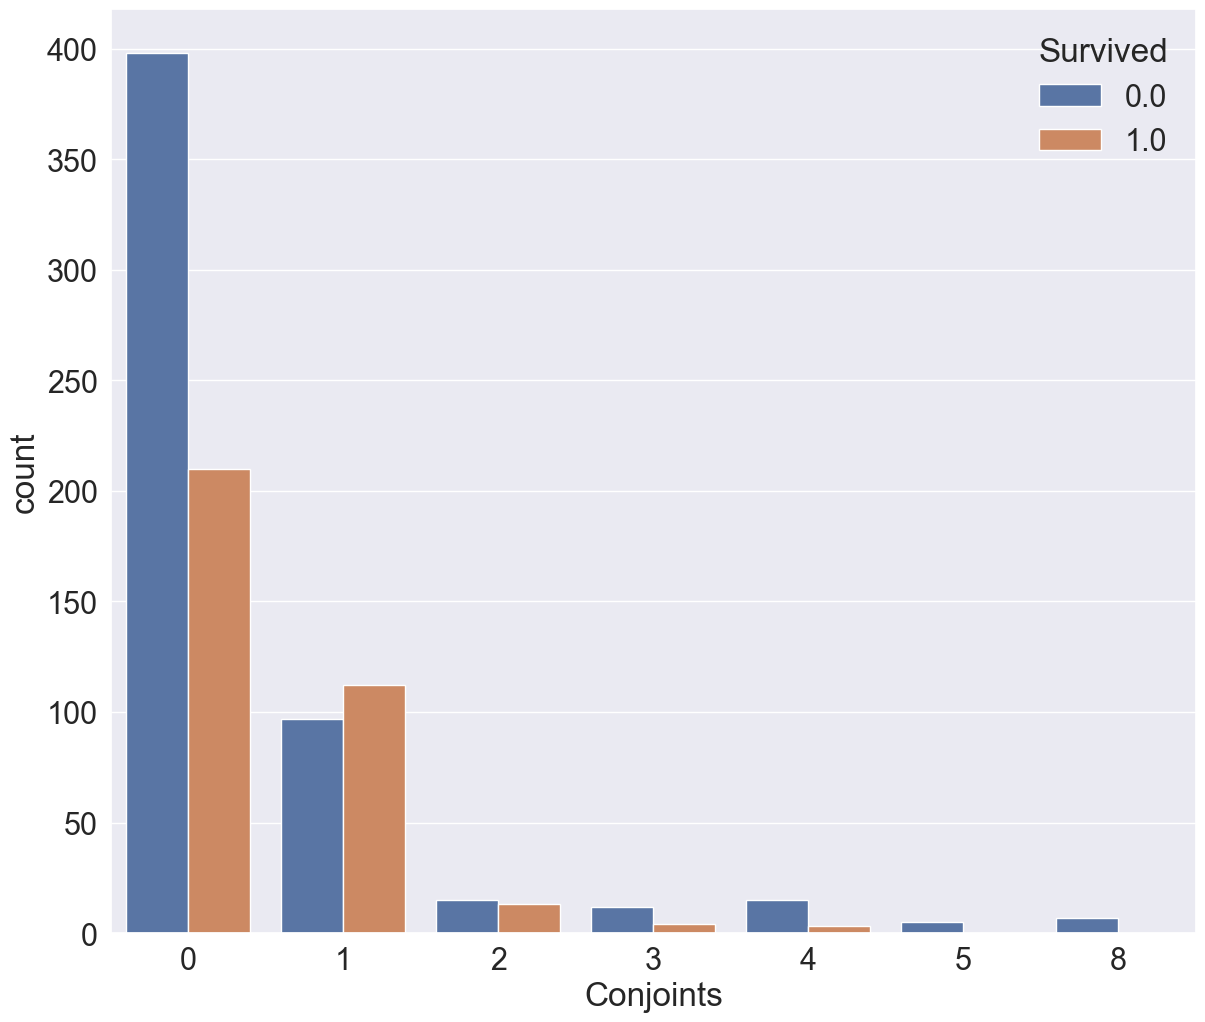

In [16]:
plt.figure(figsize=(14,12))
sns_plot = sns.countplot(x='Conjoints',hue='Survived',data=donnees);

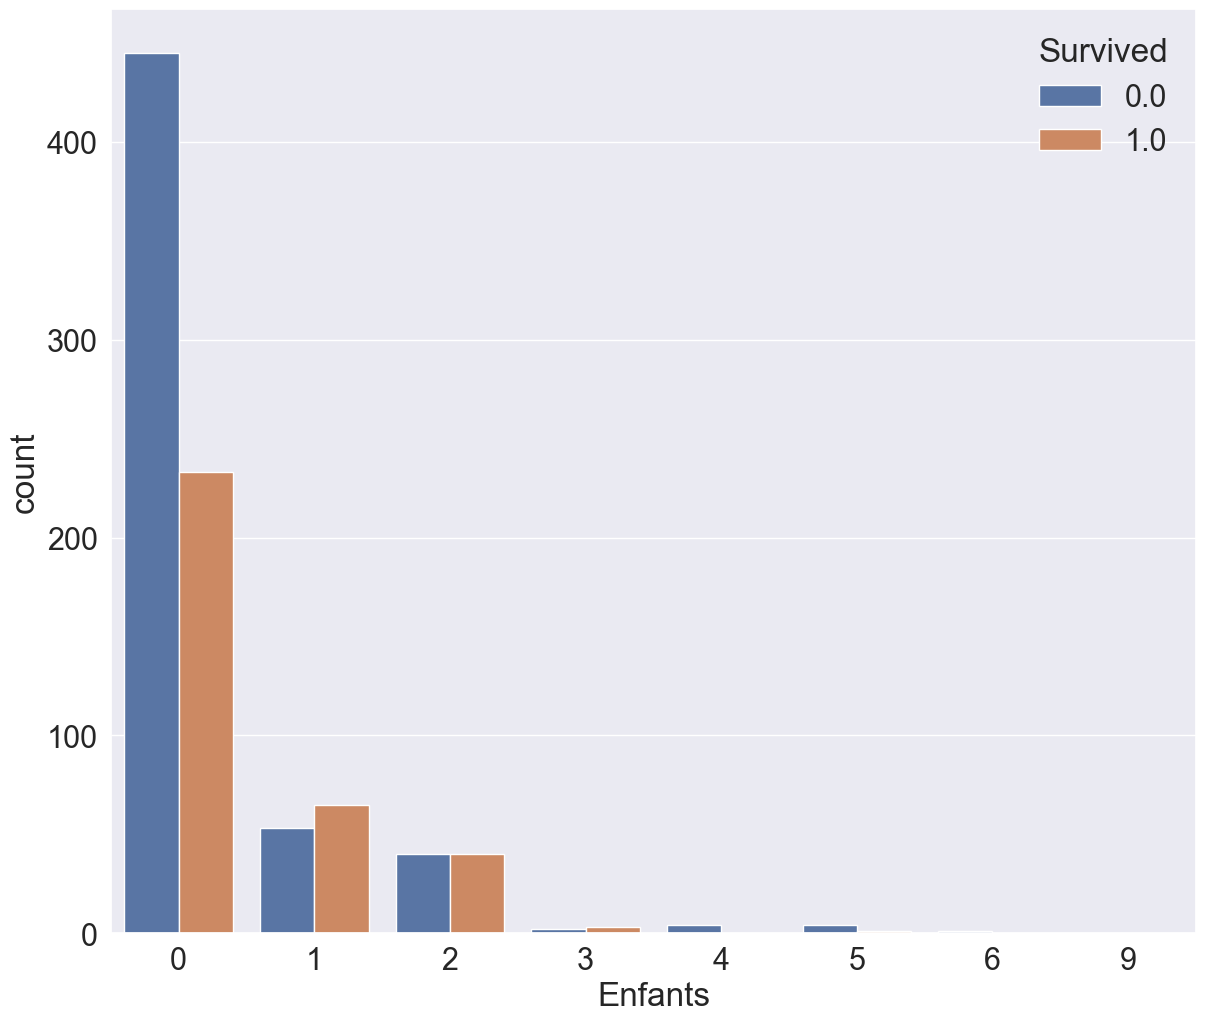

In [17]:
plt.figure(figsize=(14,12))
sns_plot = sns.countplot(x='Enfants',hue='Survived',data=donnees);

In [18]:
donnees.describe(include='all')

,Survived,Age,Fare,Sex,Title,TailleFamille,Pont,Classe,Port,Cabine,Ticket,Conjoints,Enfants,PassengerId
count,891.000000,1046.000000,1308.000000,1309,1309,1309.000000,1309,1309.000000,1309,1309.000000,1309,1309.000000,1309.000000,1309.000000
unique,NaN,NaN,NaN,2,5,NaN,9,NaN,4,NaN,26,NaN,NaN,NaN
top,NaN,NaN,NaN,Homme,Mr,NaN,Pas,NaN,S,NaN,Vide,NaN,NaN,NaN
freq,NaN,NaN,NaN,843,757,NaN,1014,NaN,914,NaN,957,NaN,NaN,NaN
mean,0.383838,29.881138,33.295479,NaN,NaN,1.883881,NaN,2.294882,NaN,0.225363,NaN,0.498854,0.385027,655.000000
std,0.486592,14.413493,51.758668,NaN,NaN,1.583639,NaN,0.837836,NaN,0.417981,NaN,1.041658,0.865560,378.020061
min,0.000000,0.170000,0.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,0.000000,NaN,0.000000,0.000000,1.000000
25%,0.000000,21.000000,7.895800,NaN,NaN,1.000000,NaN,2.000000,NaN,0.000000,NaN,0.000000,0.000000,328.000000
50%,0.000000,28.000000,14.454200,NaN,NaN,1.000000,NaN,3.000000,NaN,0.000000,NaN,0.000000,0.000000,655.000000
75%,1.000000,39.000000,31.275000,NaN,NaN,2.000000,NaN,3.000000,NaN,0.000000,NaN,1.000000,0.000000,982.000000


In [19]:
donnees.isnull().sum()

Survived         418
Age              263
Fare               1
Sex                0
Title              0
TailleFamille      0
Pont               0
Classe             0
Port               0
Cabine             0
Ticket             0
Conjoints          0
Enfants            0
PassengerId        0
dtype: int64

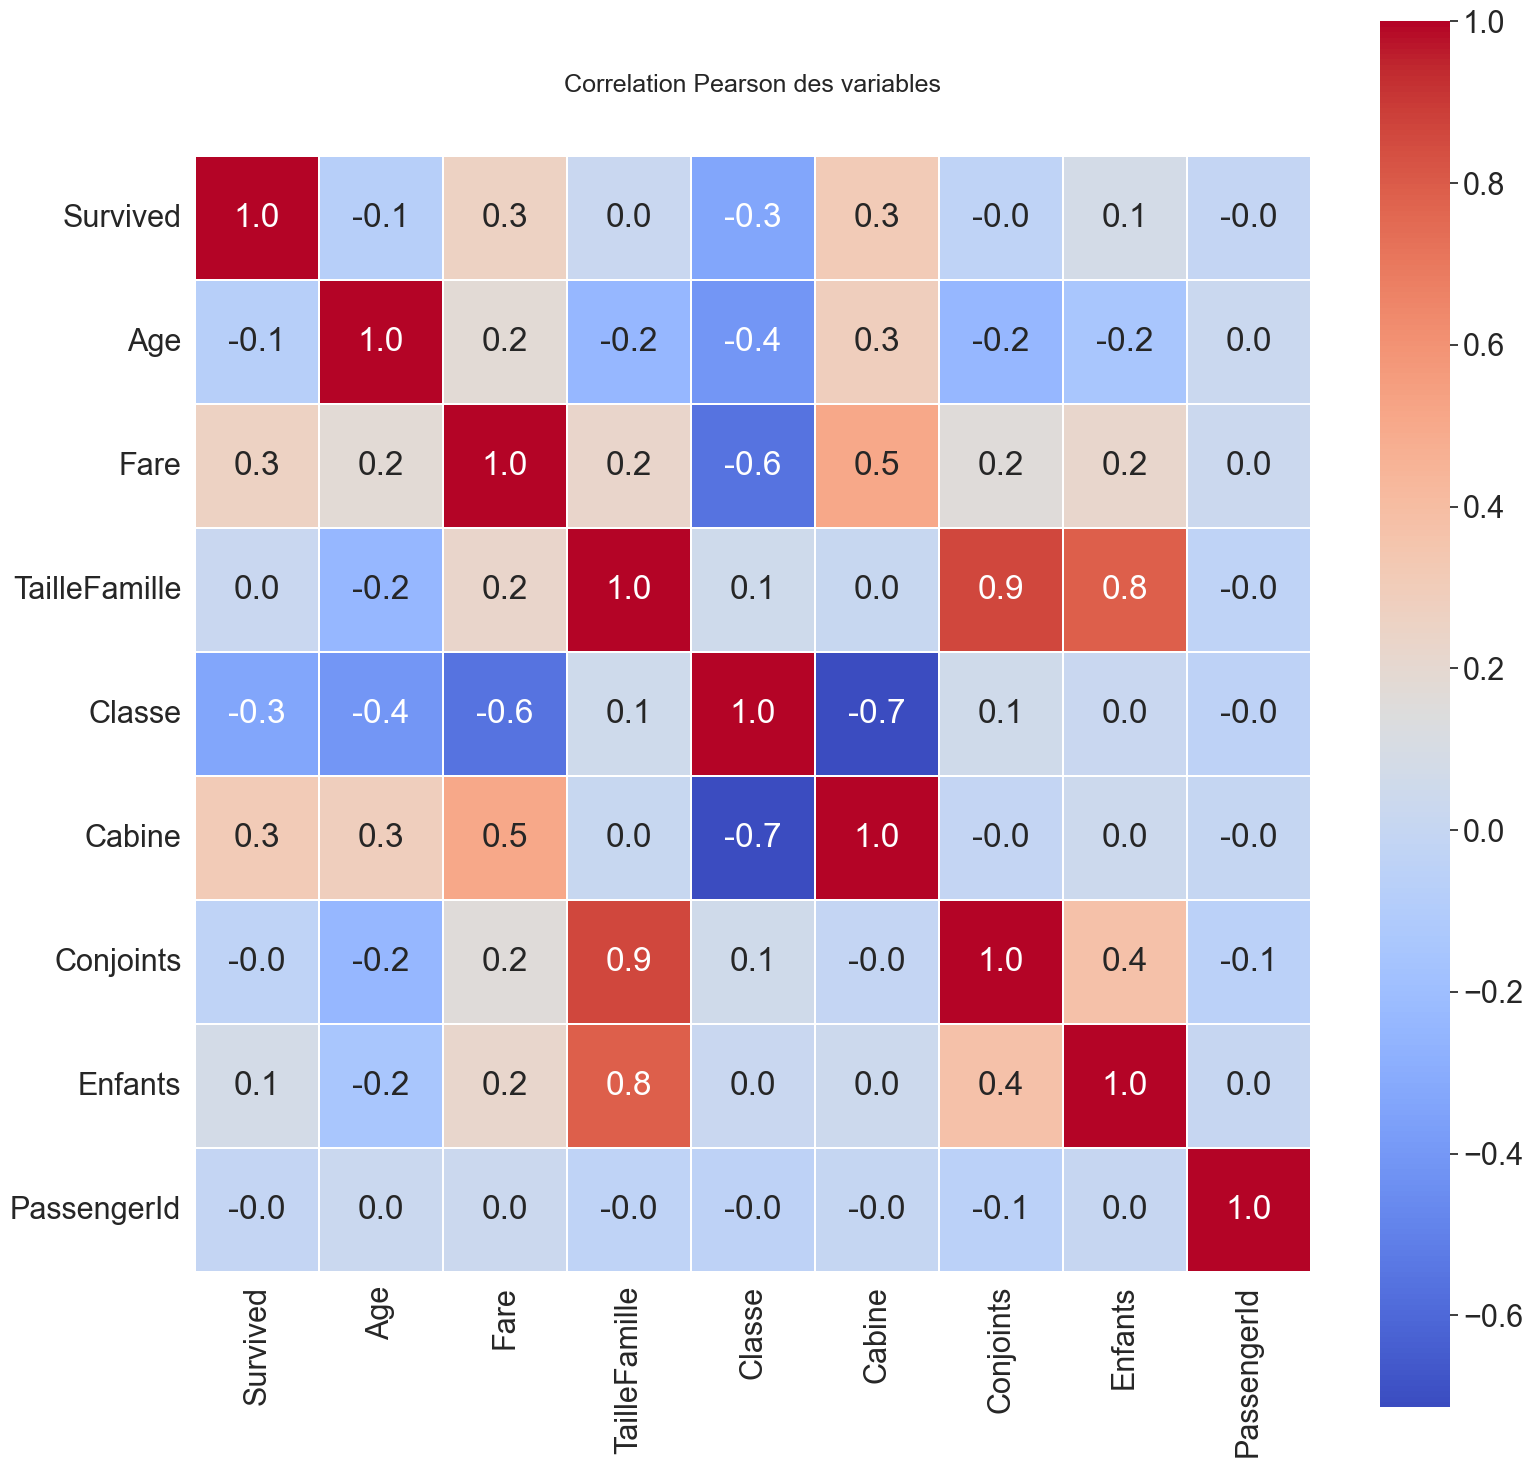

In [20]:
plt.figure(figsize=(18,18))
plt.title('Correlation Pearson des variables', y=1.05, size=18)
sns_plot = sns.heatmap(donnees.drop(columns=['Sex','Title','Pont','Port','Ticket']).corr(), fmt= '.1f',linewidths=0.3,vmax=1.0, 
            square=True, cmap='coolwarm', linecolor='white', annot=True);

In [21]:
donnees['Mere'] = 0
donnees['Mere'][(donnees.Sex == 'Femme') & (donnees.Enfants > 0) &  (donnees.Title != 'Miss')] = 1

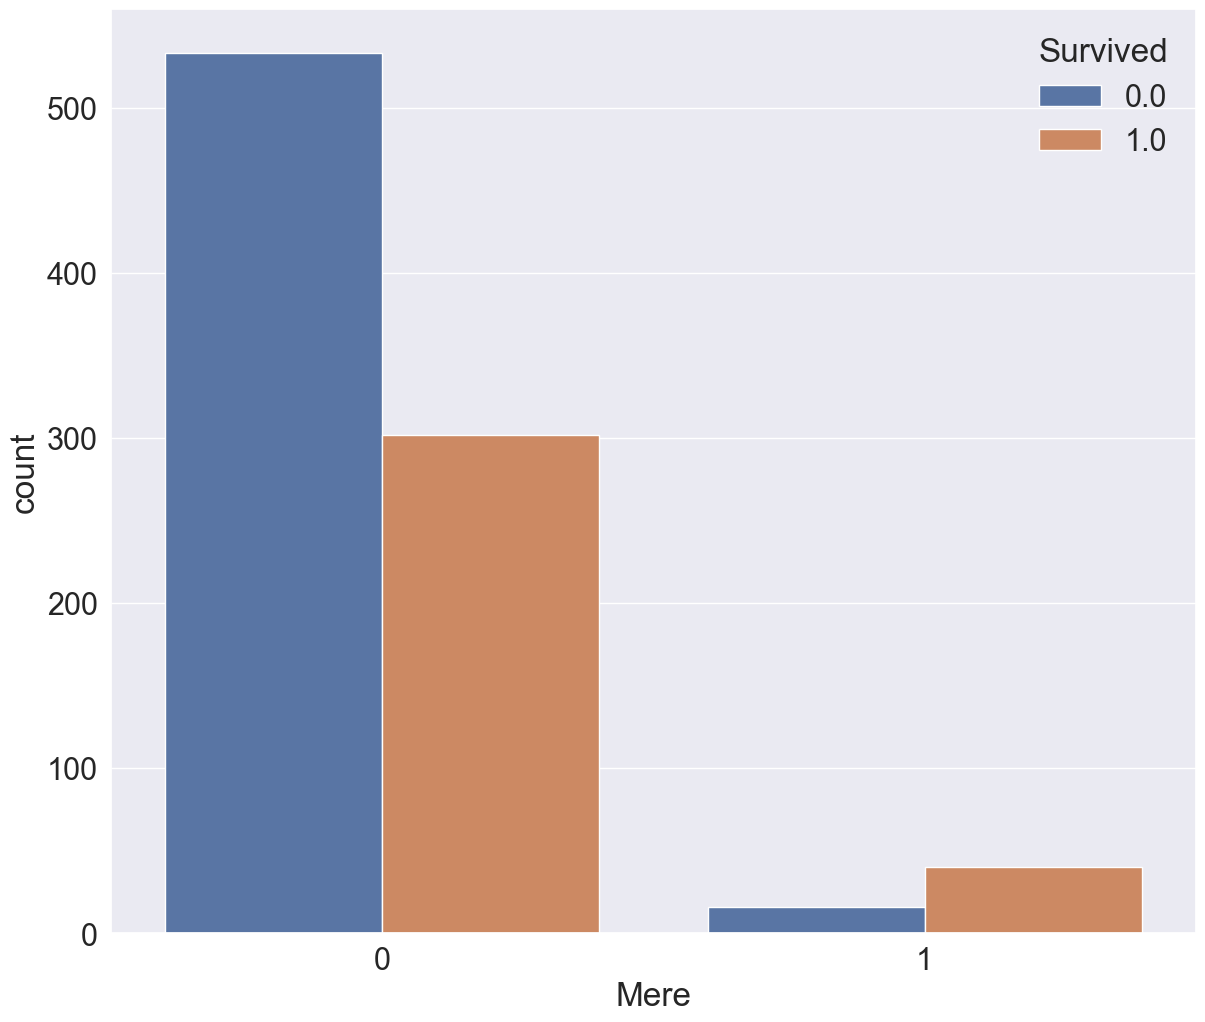

In [22]:
plt.figure(figsize=(14,12))
sns.countplot(x='Mere',hue='Survived',data=donnees);

# Le traitement des enregistrements avec Age non renseigné

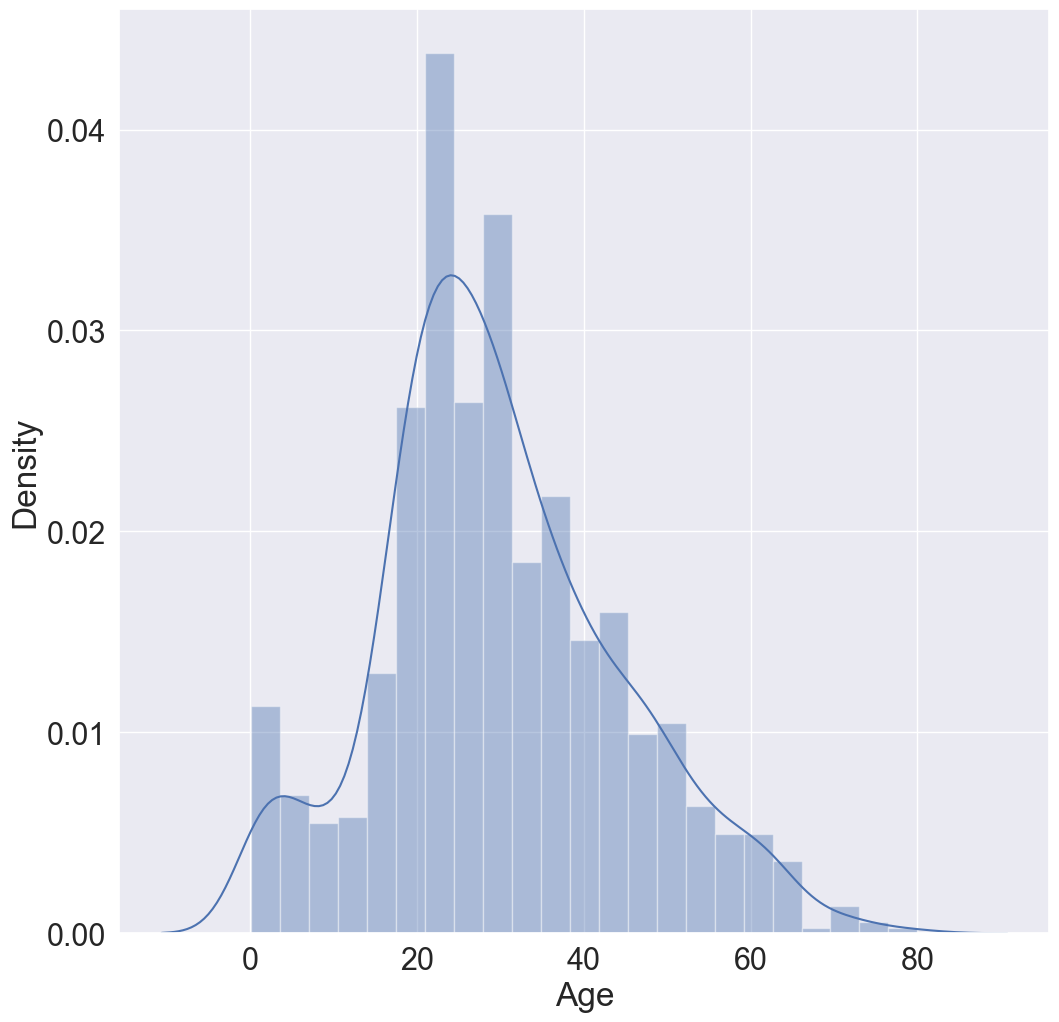

In [23]:
plt.figure(figsize=(12,12))
sns_plot = sns.distplot(donnees[~donnees.Age.isna()].Age)

In [24]:
donnees.columns

Index(['Survived', 'Age', 'Fare', 'Sex', 'Title', 'TailleFamille', 'Pont',
       'Classe', 'Port', 'Cabine', 'Ticket', 'Conjoints', 'Enfants',
       'PassengerId', 'Mere'],
      dtype='object')

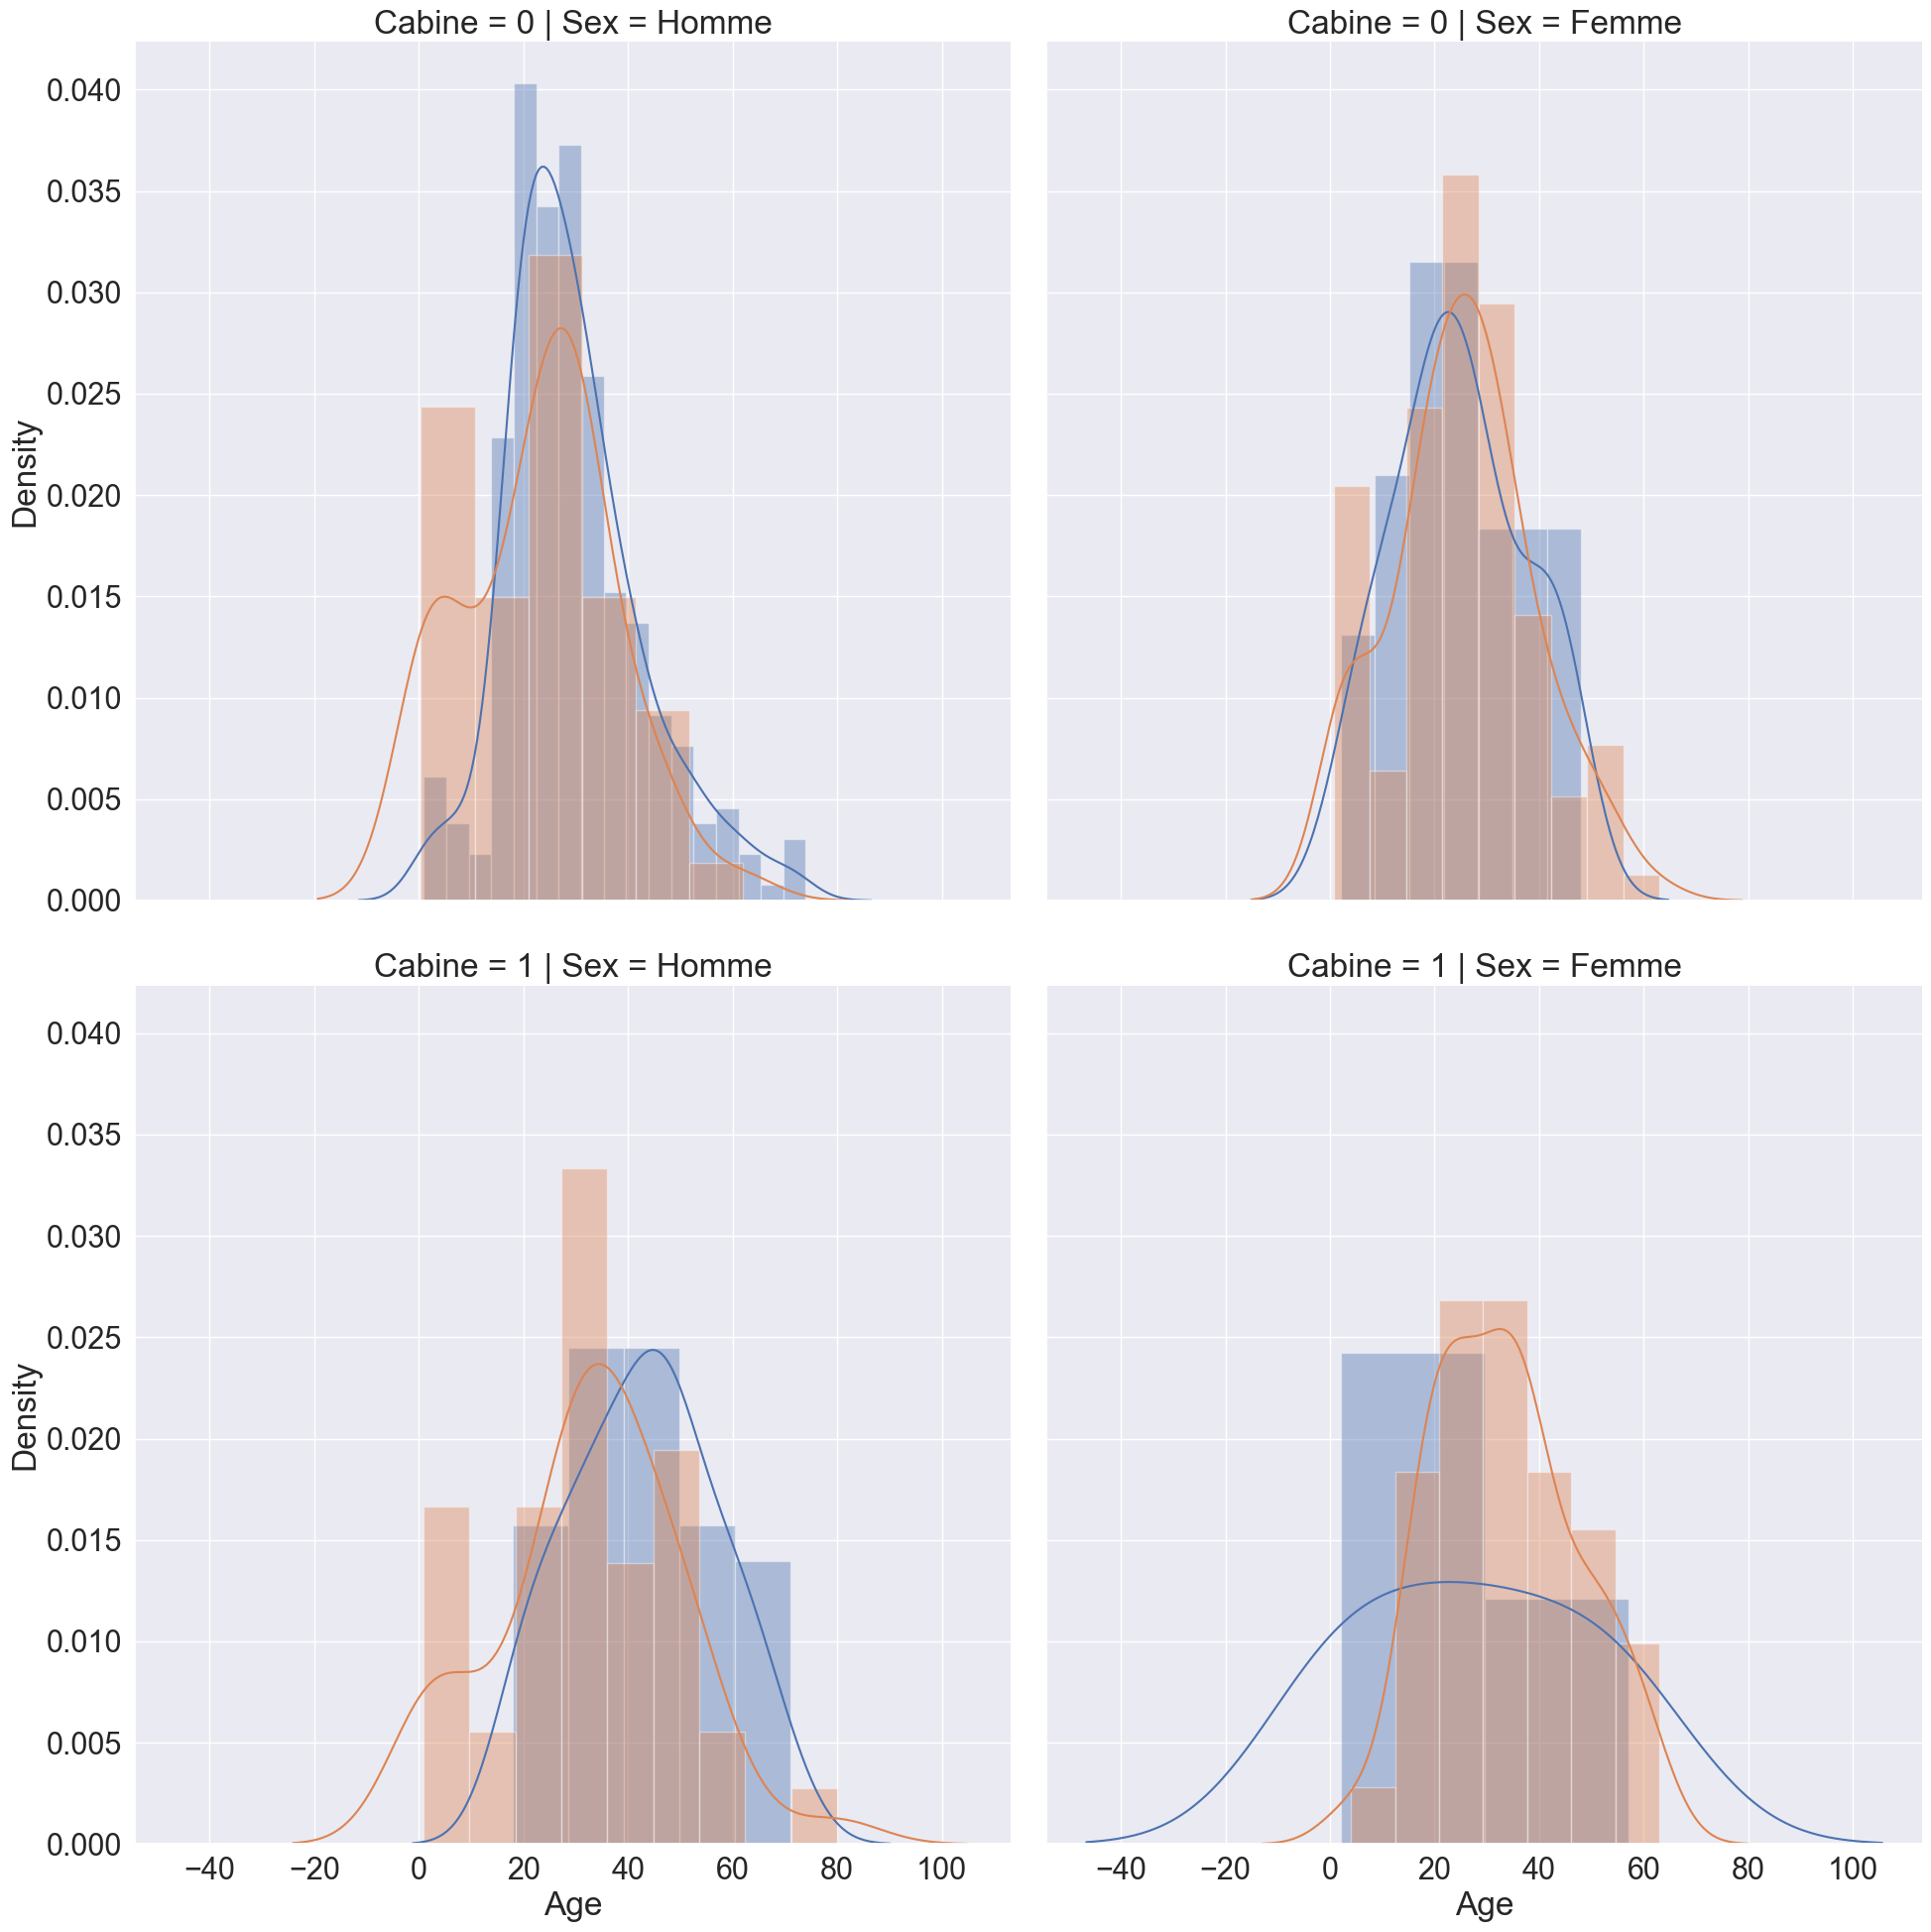

In [25]:
sns_plot = sns.FacetGrid(data=donnees[~donnees.Age.isna()],
                  col='Sex',row='Cabine', hue='Survived',height=10,aspect=1);
sns_plot.map(sns.distplot,'Age');

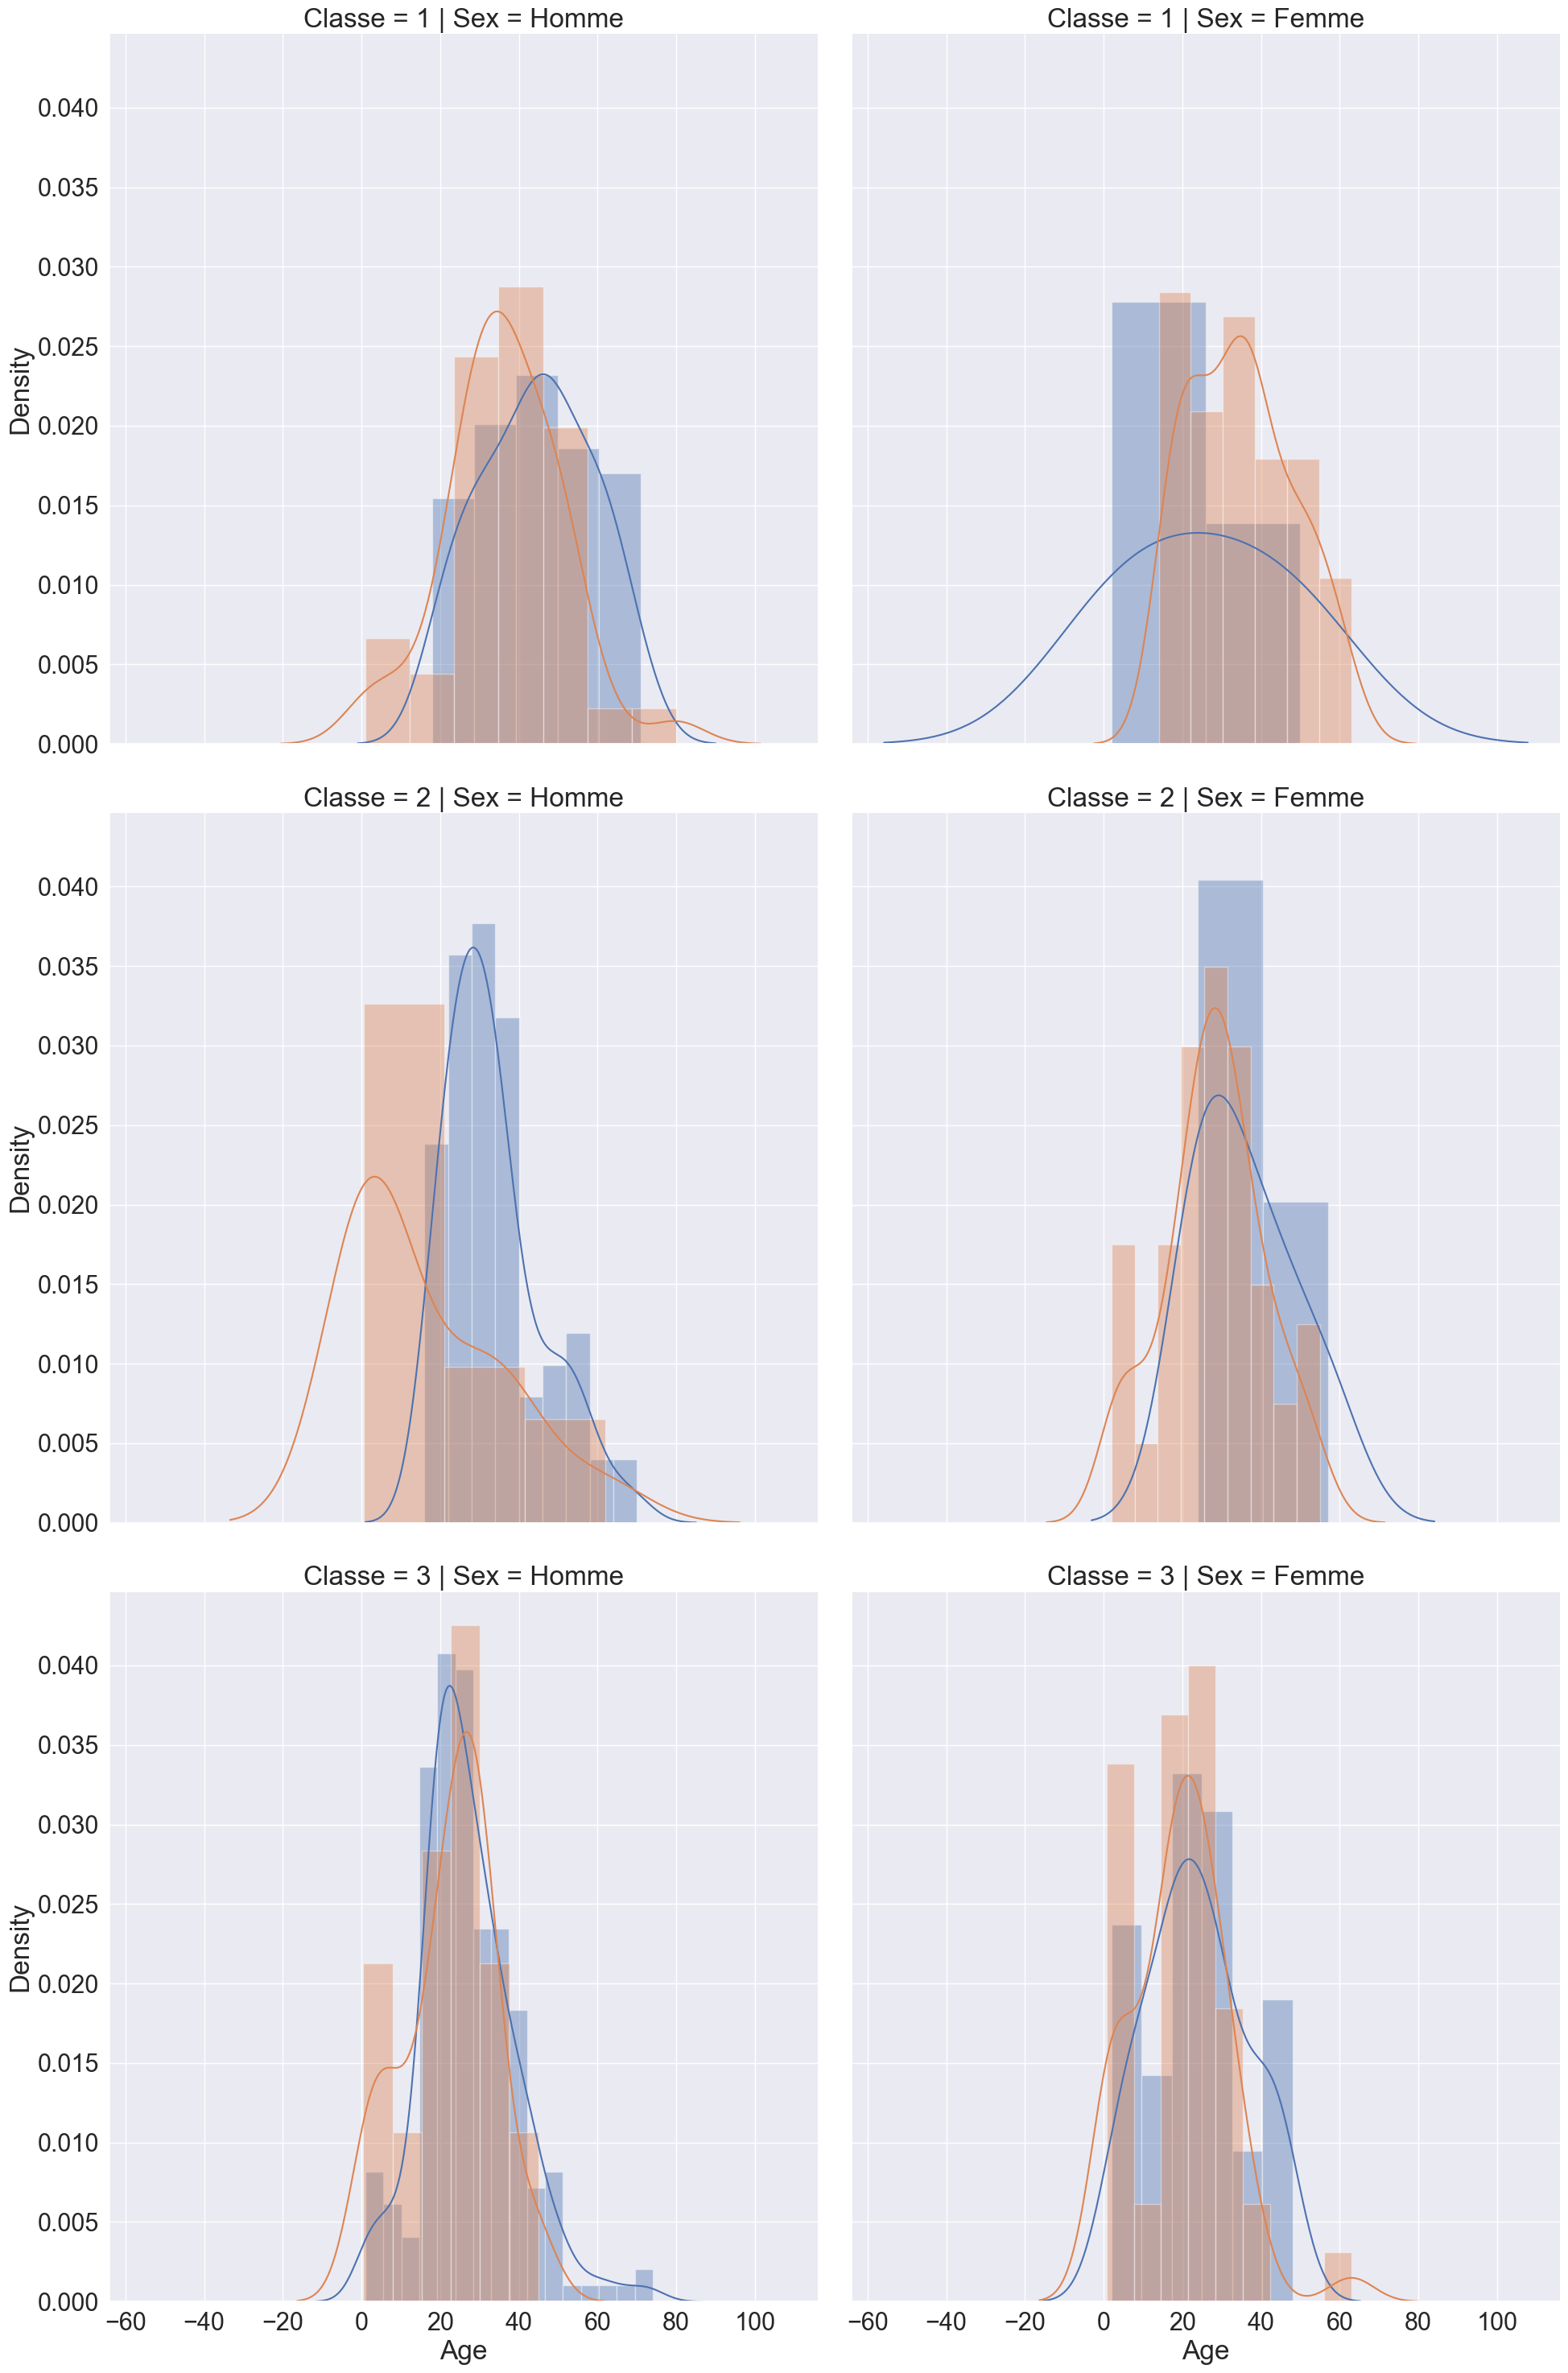

In [26]:
sns_plot = sns.FacetGrid(data=donnees[~donnees.Age.isna()],
                  col='Sex',row='Classe', hue='Survived',height=10,aspect=1);
sns_plot.map(sns.distplot,'Age');

In [27]:
donnees['AgeOld'] = donnees.Age

In [28]:
donnees.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

# L'estimation des âges manquants à l'aide de attributs Sex et Classe

In [29]:
coefficient = 1.4

In [30]:
ageCalc = donnees[~donnees.Age.isna()].groupby(['Sex','Classe']).agg({'Age':['mean','std']})
ageCalc.columns = ['_'.join(col).rstrip('_') for col in ageCalc.columns]
ageCalc.reset_index(inplace=True)
ageCalc['borneMin'] = ageCalc.Age_mean - ageCalc.Age_std*coefficient
ageCalc['borneMax'] = ageCalc.Age_mean + ageCalc.Age_std*coefficient
ageCalc.drop(columns=['Age_mean','Age_std'],inplace=True)
ageCalcCount = donnees[donnees.Age.isna()].groupby(['Sex','Classe']).agg({'Title':['count']}).reset_index()
ageCalcCount.columns = ['Sex','Classe','nb']
ageCalc = ageCalc.merge(ageCalcCount,on=['Sex','Classe'])
ageCalc

,Sex,Classe,borneMin,borneMax,nb
0,Femme,1,17.056150,57.019038,11
1,Femme,2,9.422778,45.575668,3
2,Femme,3,5.097973,39.272685,64
3,Homme,1,20.619331,61.439212,28
4,Homme,2,11.247020,50.383740,13
5,Homme,3,9.606883,42.317645,144


In [31]:
ageRand = pd.DataFrame(columns=['Sex','Classe','Age'])
for i in [ (row.Sex,row.Classe,np.random.randint(round(row.borneMin),round(row.borneMax),size=row.nb)) for indx, row in ageCalc.iterrows()]:
    calc = pd.DataFrame(columns=['Sex','Classe','Age'])
    calc.Age    = i[2]
    calc.Sex    = i[0]
    calc.Classe = i[1]
    ageRand = pd.concat([ageRand,calc])

In [32]:
for sex in ageRand.Sex.unique():
    for classe in ageRand.Classe.unique():
            donnees['Age'][ donnees.Age.isna()&
                             (donnees.Sex == sex)&
                             (donnees.Classe == classe)] = ageRand[
                                                       (ageRand.Sex == sex)&
                                                       (ageRand.Classe == classe)].Age
donnees.Age = donnees.Age.astype('int8') 
donnees['Age01'] = donnees.Age.values
donnees.Age = donnees.AgeOld

# L'estimation des âges manquants à l'aide de attributs Sex , Classe et Cabine

In [33]:
ageCalc = donnees[~donnees.Age.isna()].groupby(['Sex','Classe','Cabine']).agg({'Age':['mean','std']})
ageCalc.columns = ['_'.join(col).rstrip('_') for col in ageCalc.columns]
ageCalc.reset_index(inplace=True)
ageCalc['borneMin'] = ageCalc.Age_mean - ageCalc.Age_std*coefficient
ageCalc['borneMax'] = ageCalc.Age_mean + ageCalc.Age_std*coefficient
ageCalc.drop(columns=['Age_mean','Age_std'],inplace=True)
ageCalcCount = donnees[donnees.Age.isna()].groupby(['Sex','Classe','Cabine']).agg({'Title':['count']}).reset_index()
ageCalcCount.columns = ['Sex','Classe','Cabine','nb']
ageCalc = ageCalc.merge(ageCalcCount,on=['Sex','Classe','Cabine'])
ageCalc

,Sex,Classe,Cabine,borneMin,borneMax,nb
0,Femme,1,0,21.374172,52.978769,6
1,Femme,1,1,16.437401,57.597082,5
2,Femme,2,0,9.314940,45.540444,2
3,Femme,2,1,9.467469,46.615865,1
4,Femme,3,0,5.565033,39.437295,63
5,Femme,3,1,-4.340276,33.340276,1
6,Homme,1,0,22.253807,61.953090,15
7,Homme,1,1,20.169144,61.378725,13
8,Homme,2,0,12.318151,50.659433,12
9,Homme,2,1,-0.953651,40.286984,1


In [34]:
ageRand = pd.DataFrame(columns=['Sex','Classe','Cabine','Age'])
for i in [ (row.Sex,row.Classe,row.Cabine,np.random.randint(round(row.borneMin),round(row.borneMax),size=row.nb)) 
     for indx, row in ageCalc.iterrows()]:
    calc = pd.DataFrame(columns=['Sex','Classe','Cabine','Age'])
    calc.Age    = i[3]
    calc.Sex    = i[0]
    calc.Classe = i[1]
    calc.Cabine = i[2]
    ageRand = pd.concat([ageRand,calc])

In [35]:
for sex in ageRand.Sex.unique():
    for classe in ageRand.Classe.unique():
        for cabine in ageRand.Cabine.unique():        
            donnees['Age'][ donnees.Age.isna()&
                             (donnees.Sex == sex)&
                             (donnees.Classe == classe)&
                             (donnees.Cabine == cabine) ] = ageRand[
                                                       (ageRand.Sex == sex)&
                                                       (ageRand.Classe == classe)&
                                                       (ageRand.Cabine == cabine)].Age
donnees.Age = donnees.Age.astype('int8') 
donnees['Age02'] = donnees.Age.values

In [36]:
donnees.Age.isna().sum()

0

In [37]:
donnees.AgeOld.isna().sum()

263

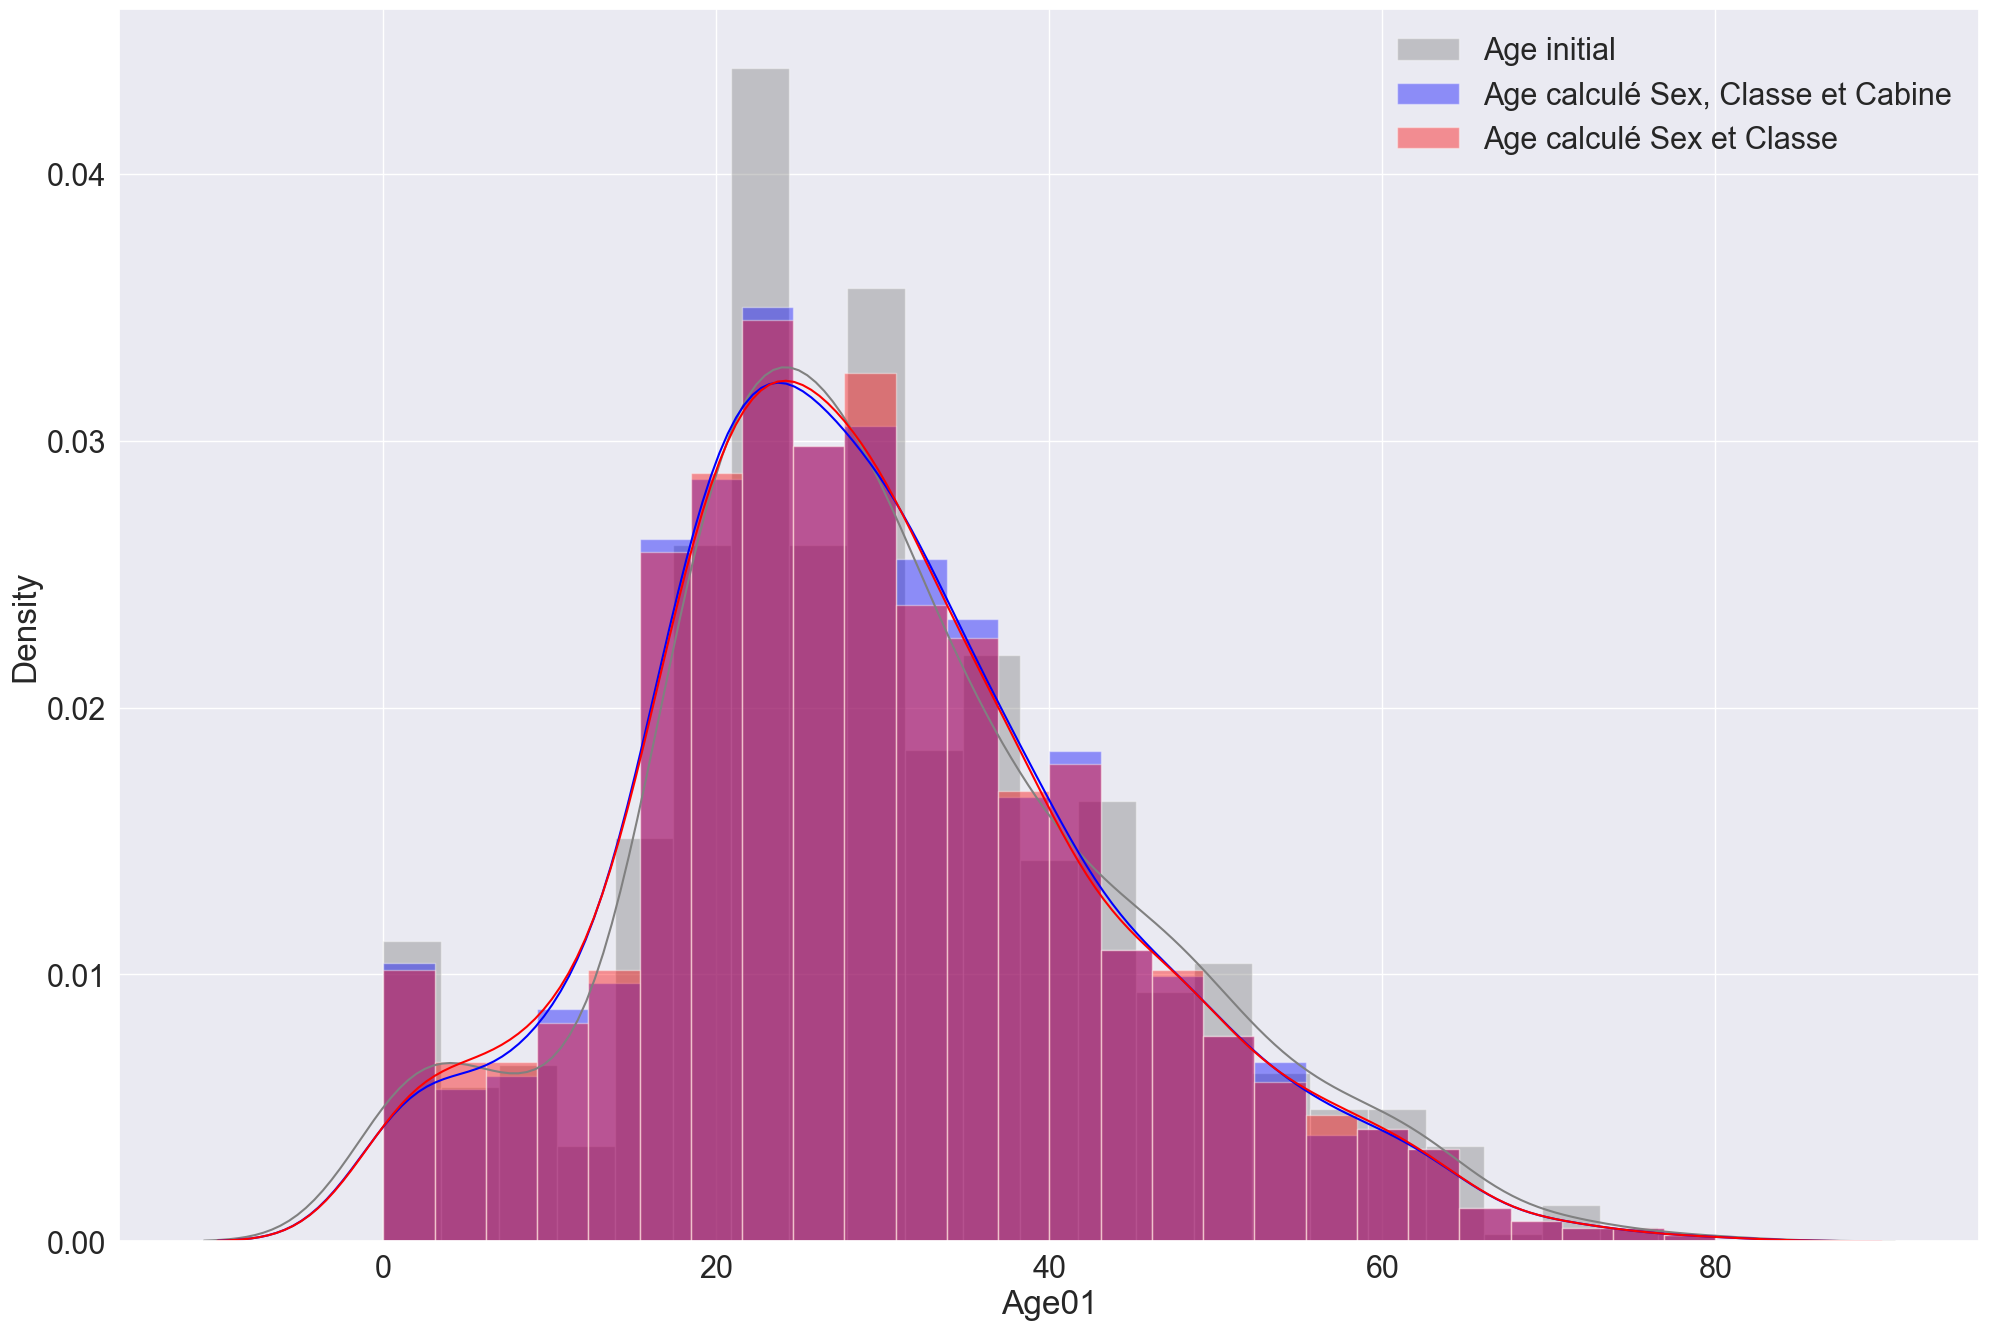

In [38]:
plt.figure(figsize=(24,16))
sns.distplot(donnees[ ~donnees.AgeOld.isna()].Age ,color='grey', label="Age initial");
sns.distplot(donnees.Age02 ,color='blue', label="Age calculé Sex, Classe et Cabine");
sns.distplot(donnees.Age01 ,color='red', label="Age calculé Sex et Classe");
plt.legend()

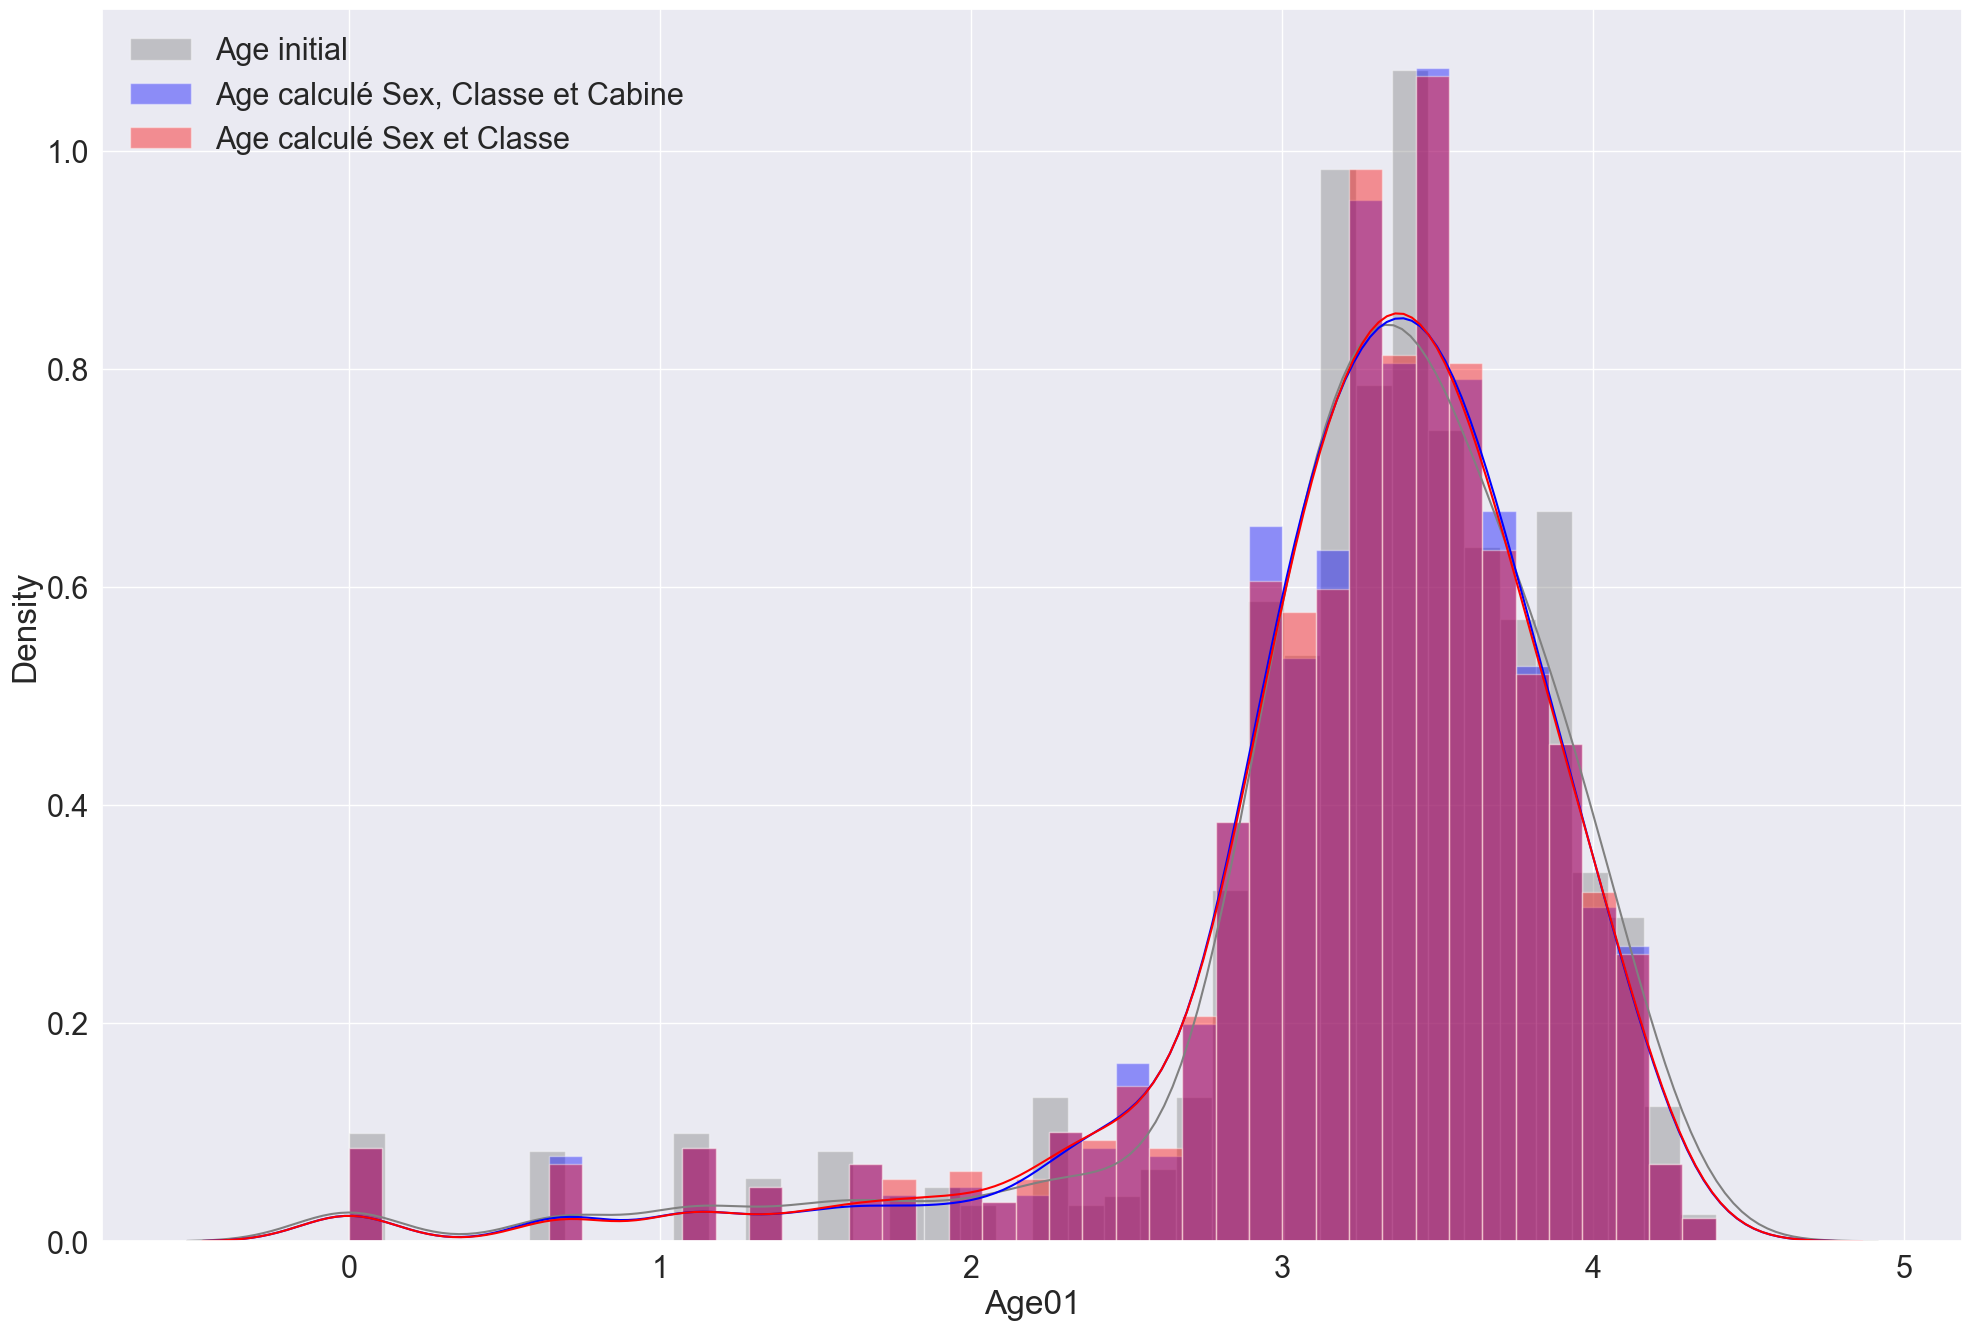

In [39]:
plt.figure(figsize=(24,16))
sns.distplot(np.log(donnees[ ~donnees.AgeOld.isna()].Age+1) ,color='grey', label="Age initial");
sns.distplot(np.log(donnees.Age02+1),color='blue', label="Age calculé Sex, Classe et Cabine");
sns.distplot(np.log(donnees.Age01+1),color='red', label="Age calculé Sex et Classe");
plt.legend()

In [40]:
donnees.Age = donnees.Age01.values
donnees.drop(columns=['AgeOld','Age01','Age02'],inplace=True)

# Le traitement du prix non renseigné

In [41]:
donnees.reset_index(drop=True,inplace=True)

In [43]:
donnees[donnees['Fare'].isnull()]

,Survived,Age,Fare,Sex,Title,TailleFamille,Pont,Classe,Port,Cabine,Ticket,Conjoints,Enfants,PassengerId,Mere
1043,NaN,60,NaN,Homme,Mr,1,Pas,3,S,0,Vide,0,0,1044,0


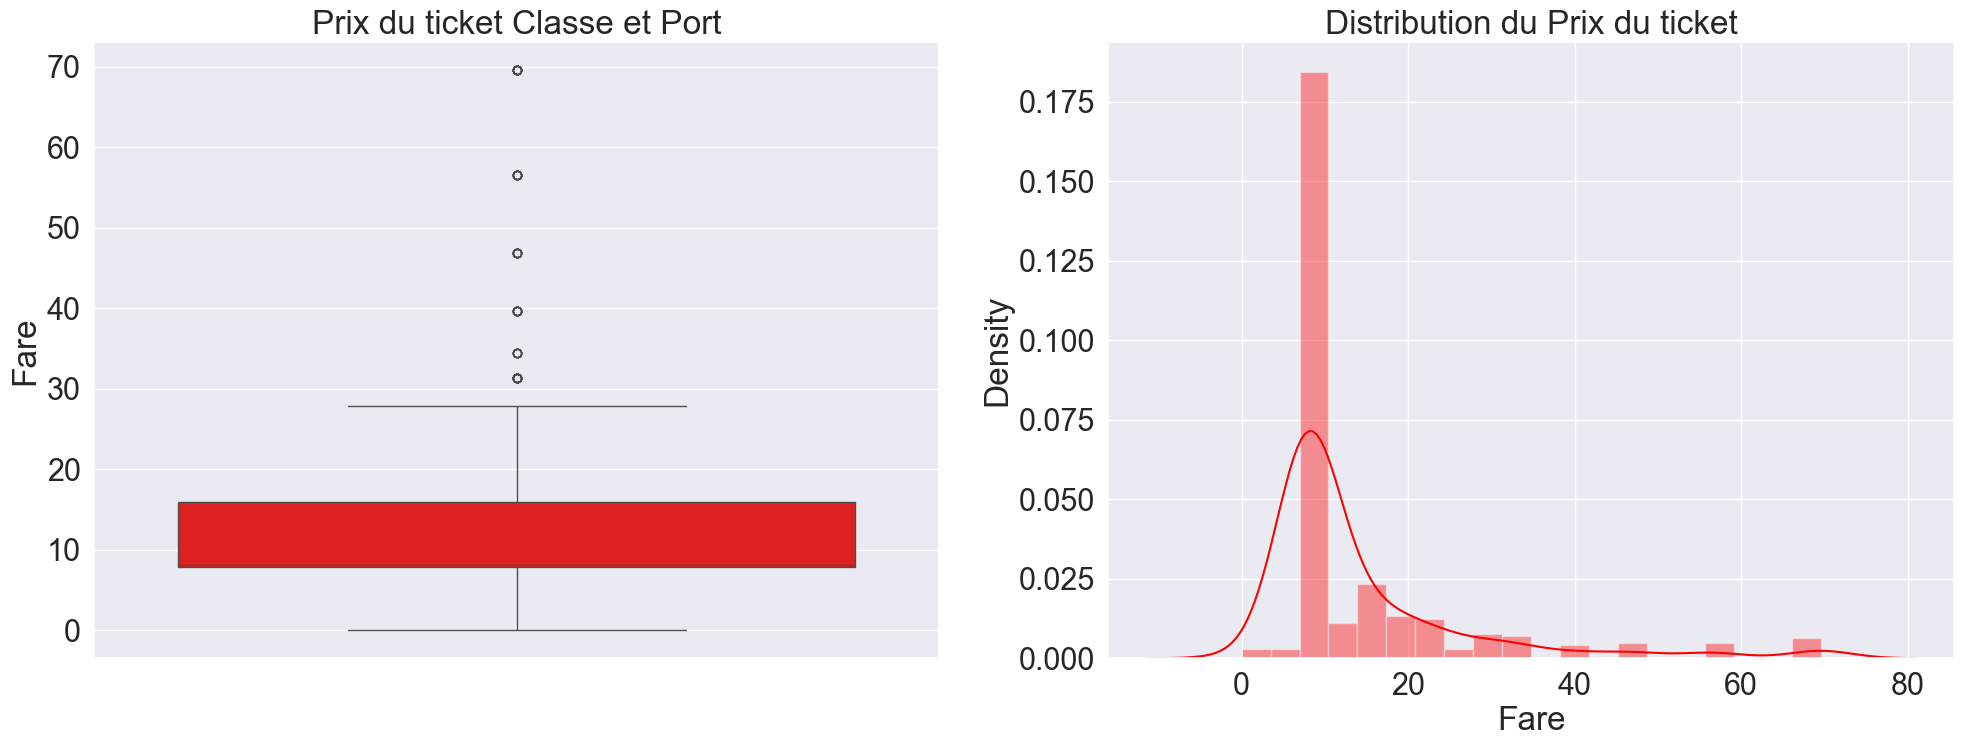

In [44]:
plt.figure(figsize=(24,8))
plt.subplot(1, 2, 1)
        
sns.boxplot(y='Fare',data=donnees[(donnees['Port'] == 'S') & 
                     (donnees['Classe'] == 3) ],color='red')
plt.title('Prix du ticket Classe et Port')
plt.subplot(1, 2, 2)

sns.distplot(donnees[(donnees.Port == 'S') & 
                     (donnees.Classe == 3) & 
                     ~ donnees.Fare.isna()].Fare, color='red', bins = 20);
plt.title('Distribution du Prix du ticket');

In [45]:
donnees[(donnees['Port'] == 'S') & (donnees['Classe'] == 3) ].Fare.median()

8.05

In [46]:
donnees.Fare[donnees['Fare'].isna()] = donnees[(donnees['Port'] == 'S') & (donnees['Classe'] == 3) & (donnees['Age'] == 3)].Fare.median()

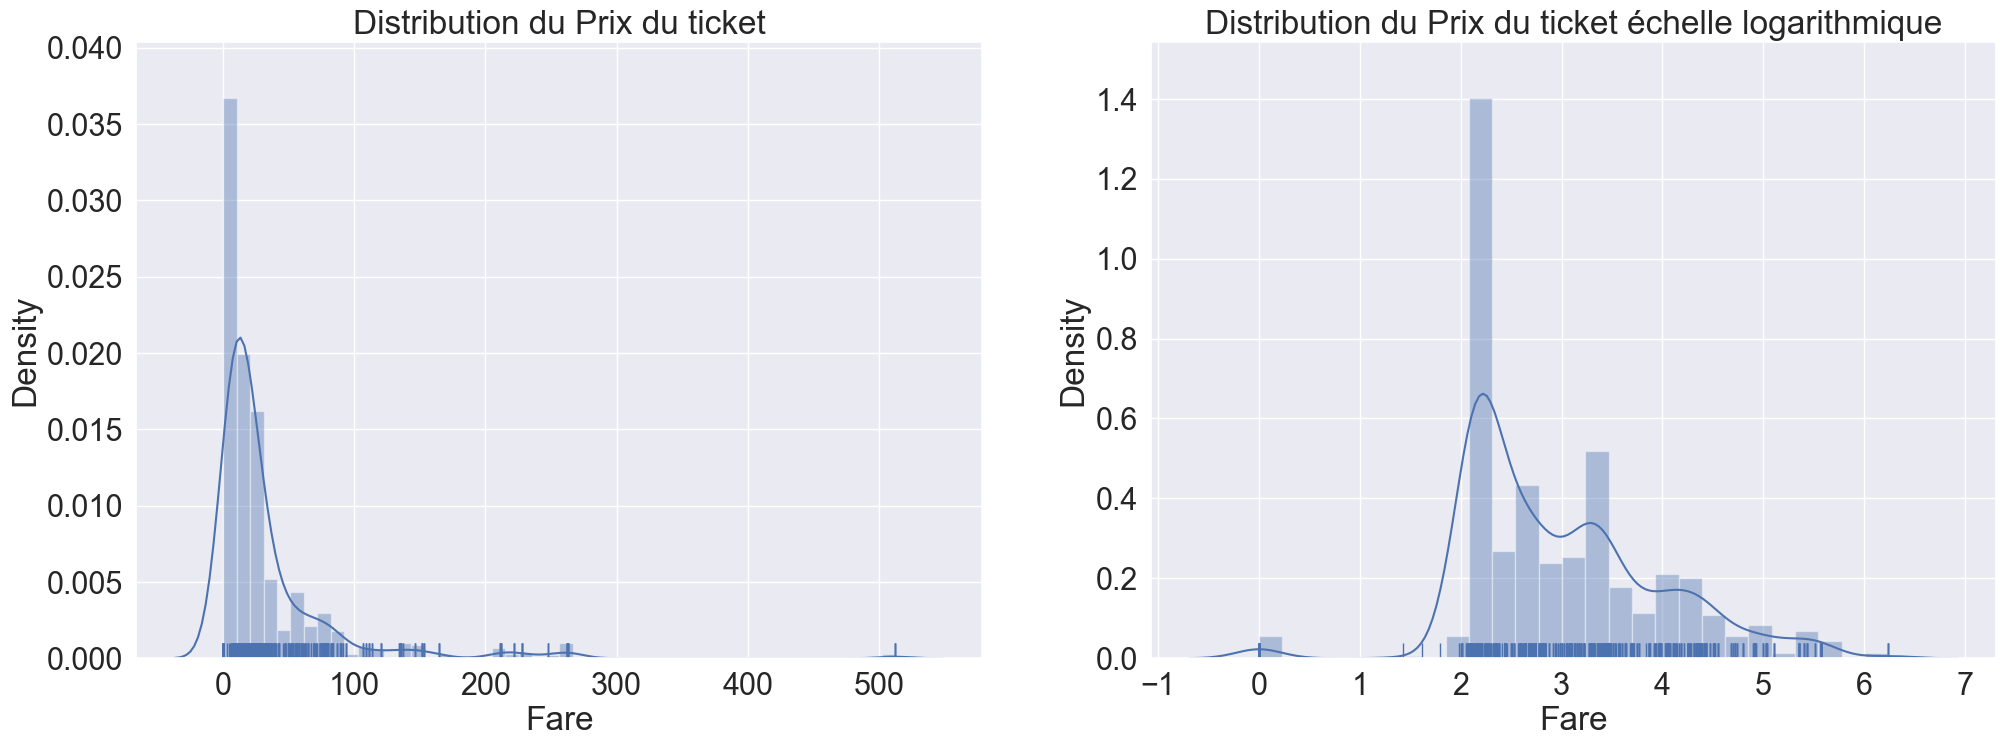

In [47]:
plt.figure(figsize=(24,8))
plt.subplot(1, 2, 1)
        
sns.distplot(donnees.Fare, rug=True);

plt.title('Distribution du Prix du ticket')
plt.subplot(1, 2, 2)

sns.distplot(np.log(donnees.Fare+1), rug=True);

plt.title('Distribution du Prix du ticket échelle logarithmique');

In [48]:
donnees.head()

,Survived,Age,Fare,Sex,Title,TailleFamille,Pont,Classe,Port,Cabine,Ticket,Conjoints,Enfants,PassengerId,Mere
0,0.0,22,7.2500,Homme,Mr,2,Pas,3,S,0,A,1,0,1,0
1,1.0,38,71.2833,Femme,Mrs,2,C,1,C,1,PC,1,0,2,0
2,1.0,26,7.9250,Femme,Miss,1,Pas,3,S,0,SOTONOQ,0,0,3,0
3,1.0,35,53.1000,Femme,Mrs,2,C,1,S,1,Vide,1,0,4,0
4,0.0,35,8.0500,Homme,Mr,1,Pas,3,S,0,Vide,0,0,5,0


In [49]:
def conversionVariableCategorielle(donnees,variable):
    dicoVar = {nom:indx for indx,nom in enumerate(donnees[variable].unique())}
    dicoVarRev = {indx:nom for indx,nom in enumerate(donnees[variable].unique())}
    donnees[variable] = donnees[variable].apply(lambda x : dicoVar[x])
    return dicoVar,dicoVarRev

dicoSex,dicoSexRev       = conversionVariableCategorielle(donnees,'Sex')
dicoTitle,dicoTitleRev   = conversionVariableCategorielle(donnees,'Title')
dicoPont,dicoPontRev     = conversionVariableCategorielle(donnees,'Pont')
dicoPort,dicoPortRev     = conversionVariableCategorielle(donnees,'Port')
dicoTicket,dicoTicketRev = conversionVariableCategorielle(donnees,'Ticket')
donnees.head()

,Survived,Age,Fare,Sex,Title,TailleFamille,Pont,Classe,Port,Cabine,Ticket,Conjoints,Enfants,PassengerId,Mere
0,0.0,22,7.2500,0,0,2,0,3,0,0,0,1,0,1,0
1,1.0,38,71.2833,1,1,2,1,1,1,1,1,1,0,2,0
2,1.0,26,7.9250,1,2,1,0,3,0,0,2,0,0,3,0
3,1.0,35,53.1000,1,1,2,1,1,0,1,3,1,0,4,0
4,0.0,35,8.0500,0,0,1,0,3,0,0,3,0,0,5,0


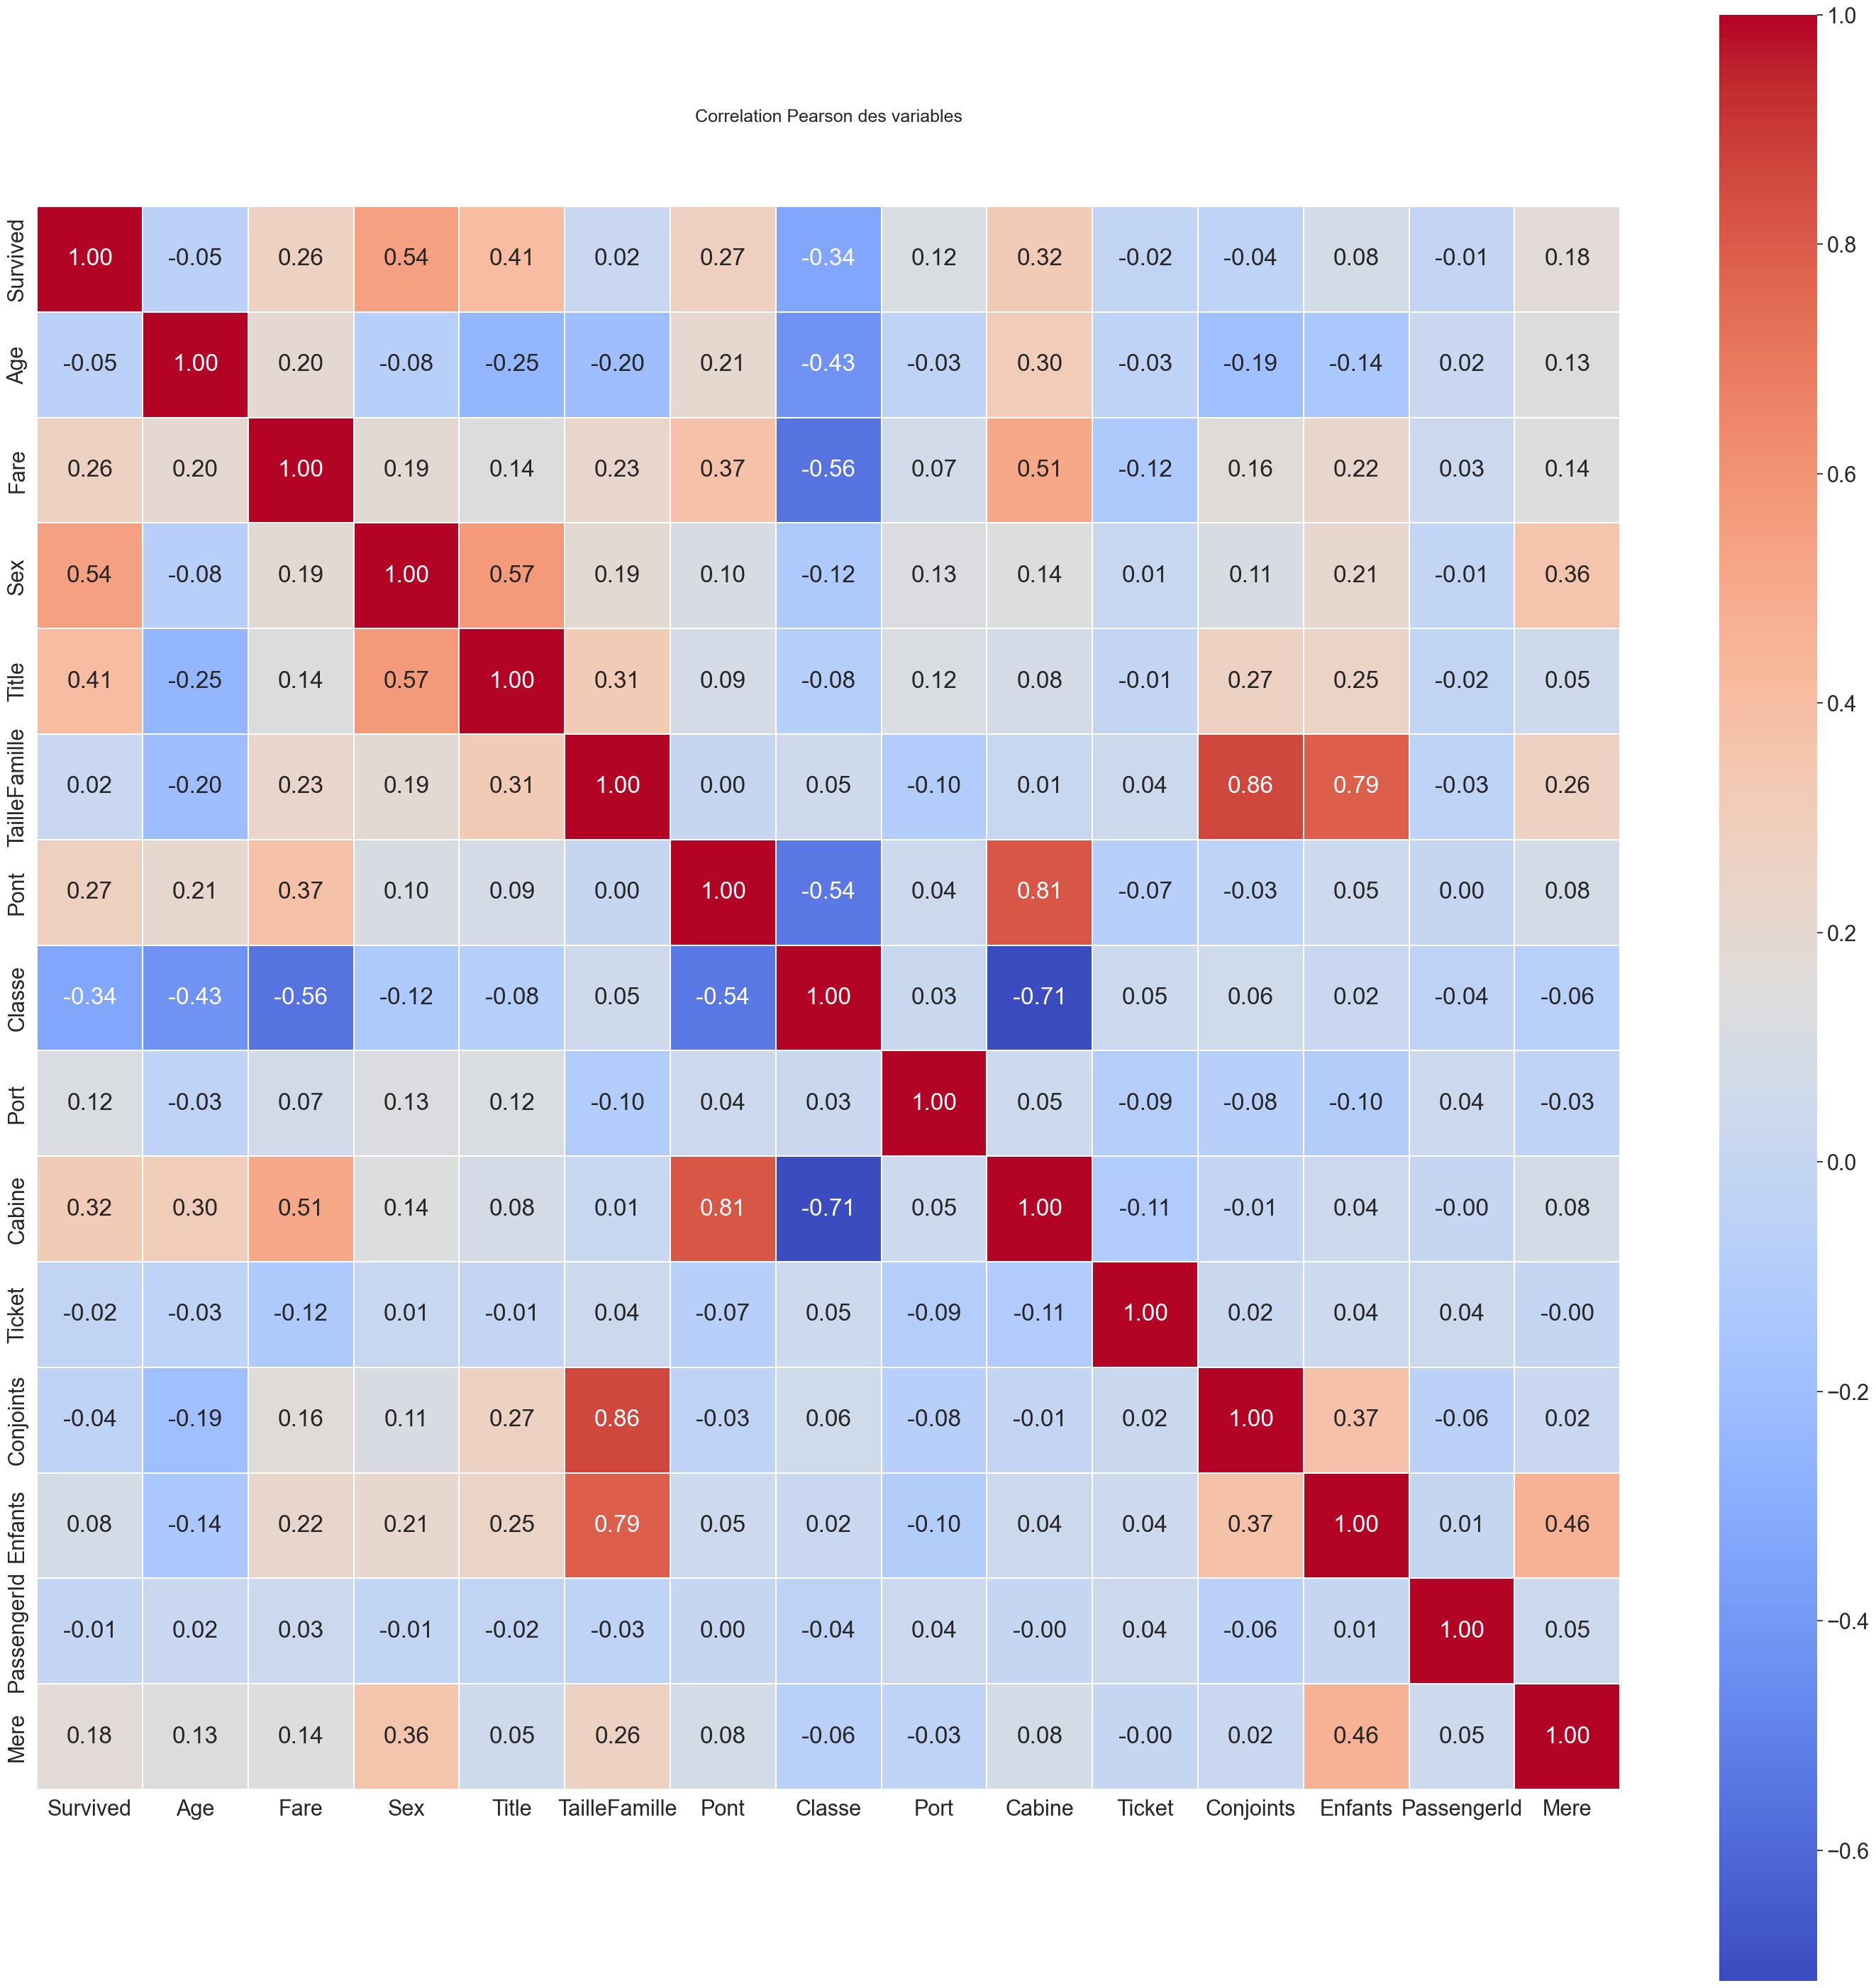

In [52]:
plt.figure(figsize=(36,36))
plt.title('Correlation Pearson des variables', y=1.05, size=18)
sns.heatmap(donnees.corr(), fmt= '.2f',linewidths=0.3,vmax=1.0, 
            square=True, cmap='coolwarm', linecolor='white', annot=True);

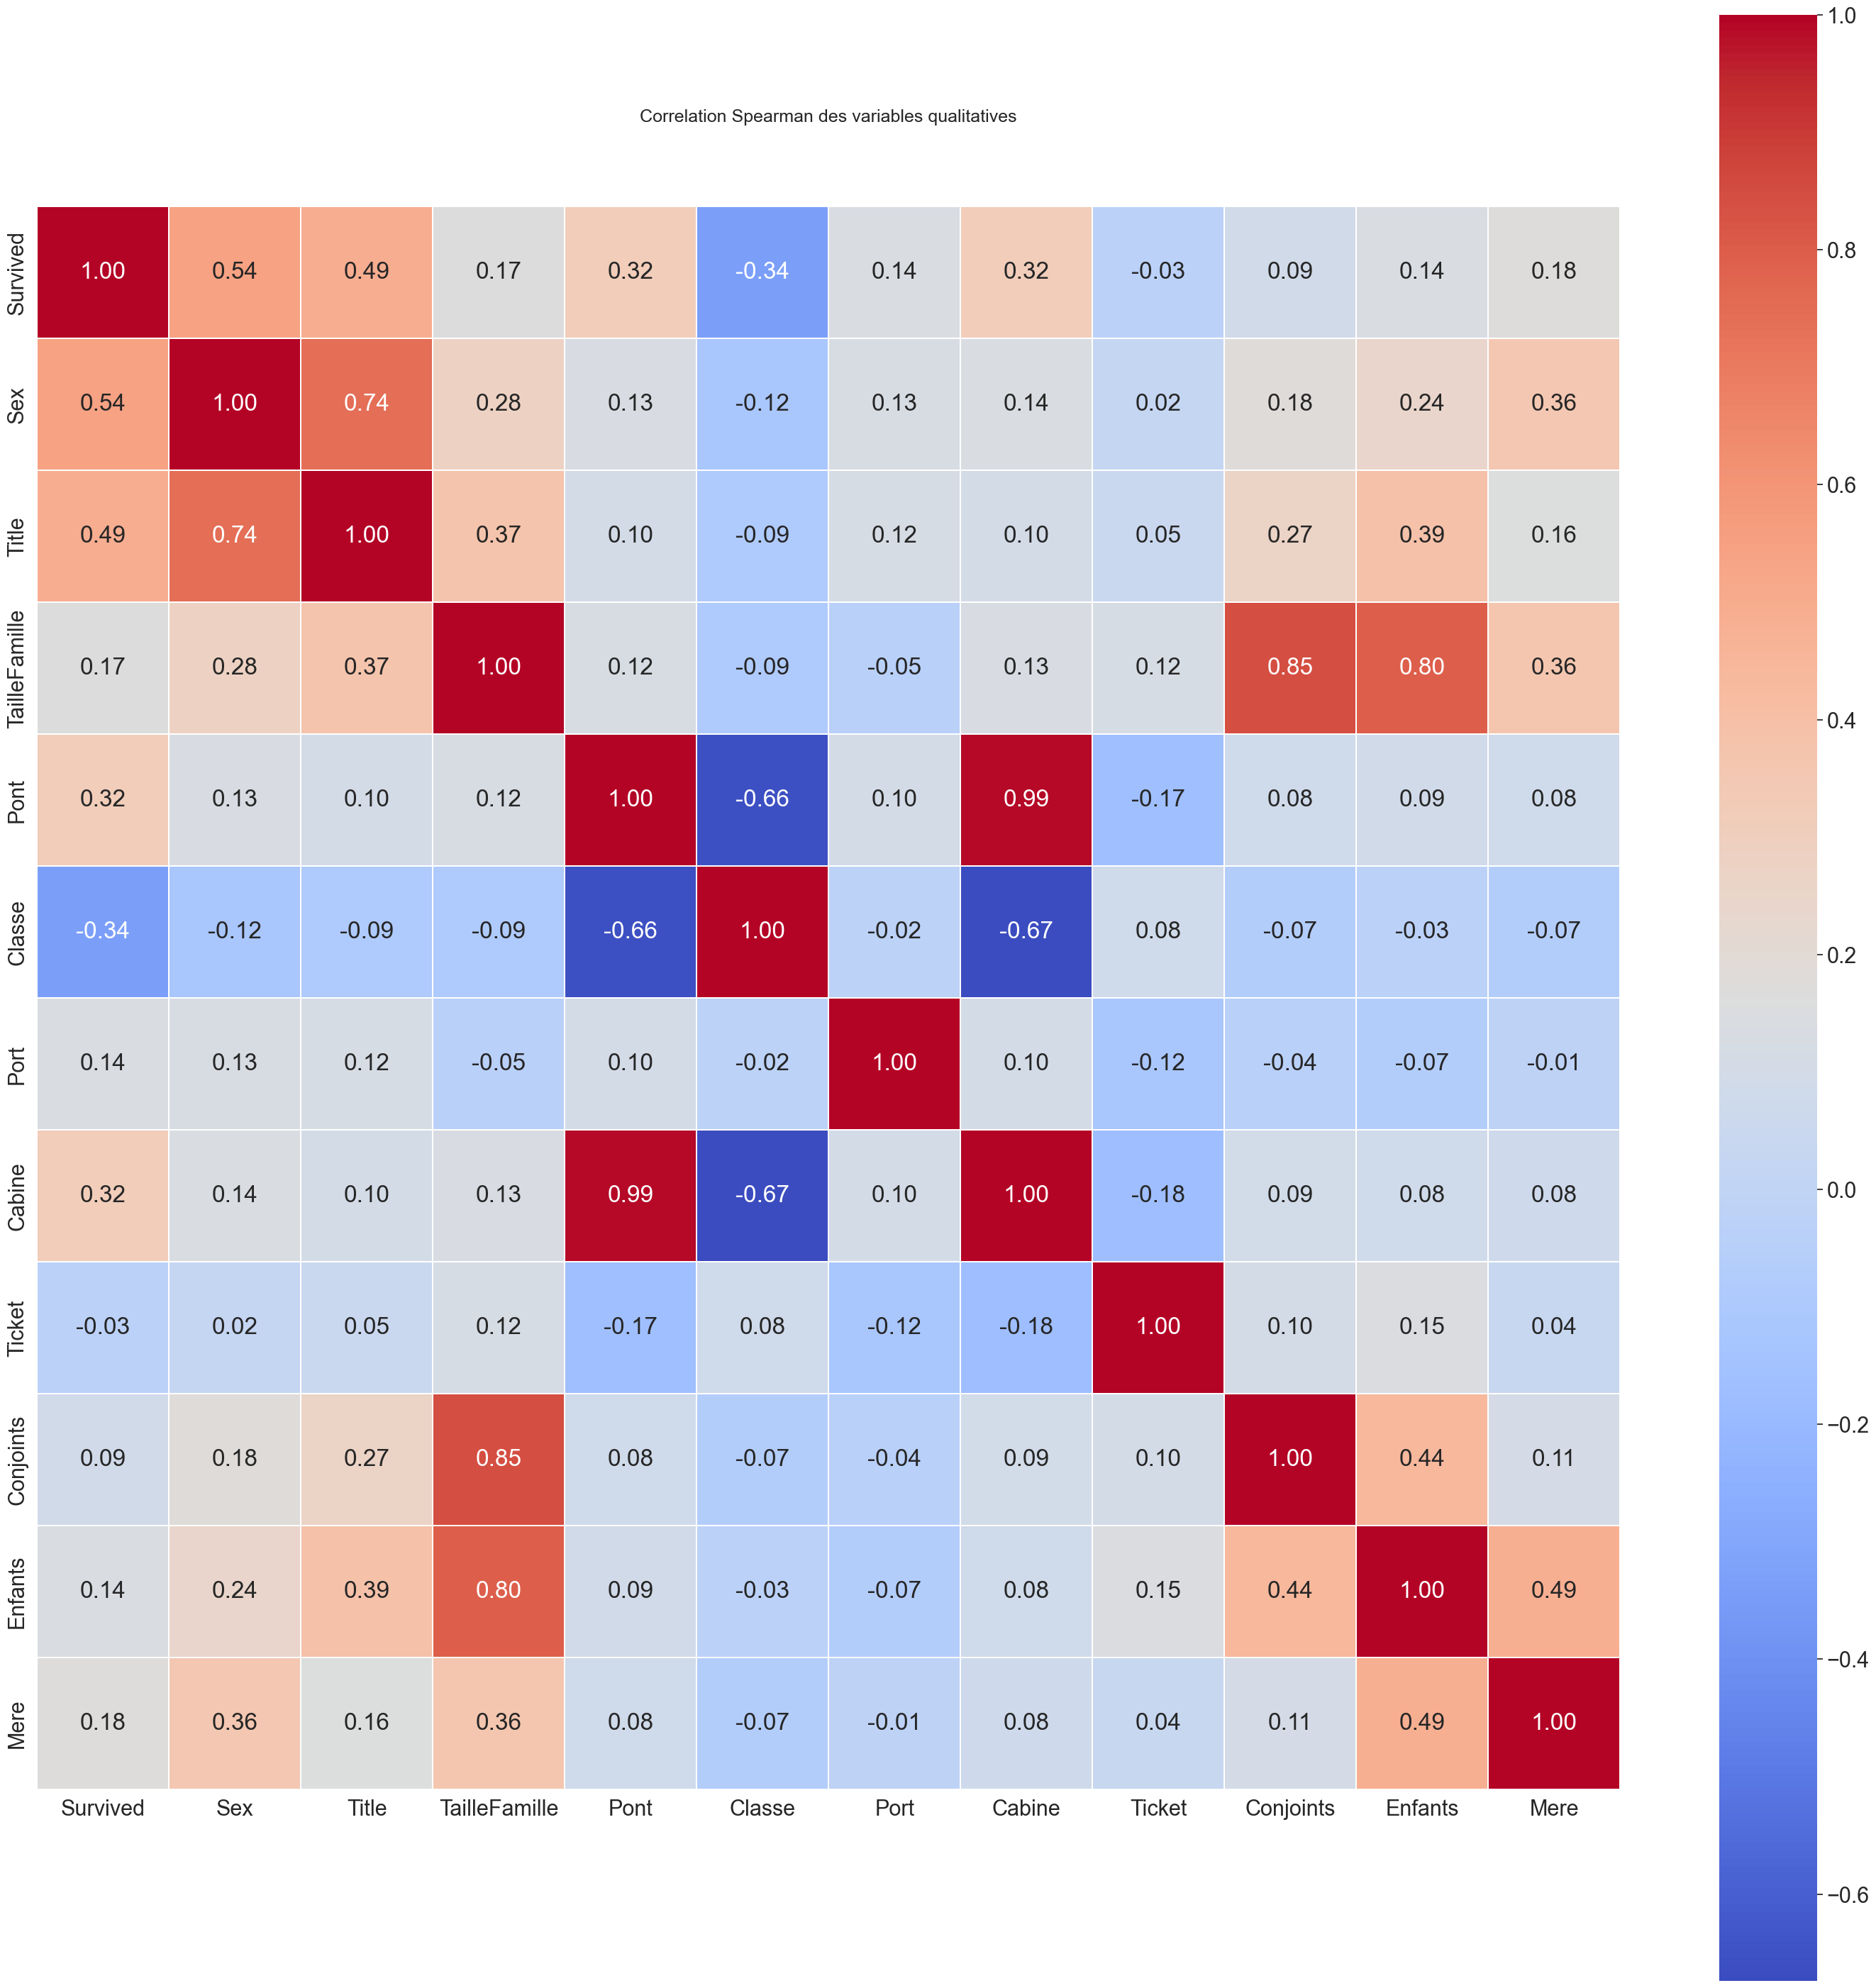

In [54]:
plt.figure(figsize=(36,36))
plt.title('Correlation Spearman des variables qualitatives', y=1.05, size=18)
sns.heatmap(donnees[['Survived', 'Sex', 'Title', 'TailleFamille', 'Pont',
                     'Classe', 'Port', 'Cabine', 'Ticket', 
                     'Conjoints', 'Enfants', 'Mere']].corr(method='spearman'), 
            fmt= '.2f',linewidths=0.3,vmax=1.0, 
            square=True, cmap='coolwarm', linecolor='white', annot=True);